In [ ]:
# importing tabular data and matrices handlers
import pandas as pd
import numpy as np

import itertools

#for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer

#for scrapping
import snscrape.modules.twitter as sntwitter

#for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer

#importing for sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#import pipeline and modules required for hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer


#importing classification models
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Ensemble methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier

# importing for calculations
from numpy import mean
from numpy import std

#text to emotion and toxic text categorization library
import text2emotion as te
from detoxify import Detoxify

#importing visualization packages
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

#importing to ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 75,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Soumya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Soumya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Soumya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading the data 

In [ ]:
def extract_tweets(hashtags, max_tweets):
  """
  Load tweets
  """
  tweet = []
  for i,tw in enumerate(sntwitter.TwitterSearchScraper(hashtags).get_items()):
          if i > max_tweets:
            break
          tweet.append([tw.date, tw.id, tw.username, tw.content])
  return tweet 
hashtags = '#elections since:2019-01-01 until:2023-01-31 lang:en'
max_tweets = 6000
lst = extract_tweets(hashtags, max_tweets)

In [ ]:
lst

[[datetime.datetime(2023, 1, 30, 23, 51, 24, tzinfo=datetime.timezone.utc),
  1620208085418803201,
  'ExactlyCharley',
  "We so desperately needed a #Majority in the Congress. At least 3 shitholes that should NEVER have been elected. I've lost confidence in our #Elections. \nWhy hasn't Santos opponent asked for a #Recall. https://t.co/l2N74jY4zK"],
 [datetime.datetime(2023, 1, 30, 23, 48, 39, tzinfo=datetime.timezone.utc),
  1620207396202348546,
  'amiya_rbehera',
  "A party is, by definition, a faction that is united to fight for a common goal that is adverse to the rights of other citizens and the common good. It's an evil organization and the cause of all civil wars around the world. #Elections   https://t.co/rPYpNNvhY9"],
 [datetime.datetime(2023, 1, 30, 23, 45, 23, tzinfo=datetime.timezone.utc),
  1620206572357193729,
  'Grossman4NJ',
  '@Marlene50720901 @mitchellvii Yes. #DeSantis is supported by all #Republicans who are are tired of losing with #Trump and want candidates with di

In [ ]:
# loading tweets, other data and creating its dataframe
tweets_df = pd.DataFrame(lst , columns=['Date_Time', 'Tweet_Id', 'Username', 'Tweet'])
tweets_df.head()

Date_Time             Tweet_Id         Username  \
0 2023-01-30 23:51:24+00:00  1620208085418803201   ExactlyCharley   
1 2023-01-30 23:48:39+00:00  1620207396202348546    amiya_rbehera   
2 2023-01-30 23:45:23+00:00  1620206572357193729      Grossman4NJ   
3 2023-01-30 23:41:34+00:00  1620205611865735168  FirstRebelMedia   
4 2023-01-30 23:36:36+00:00  1620204362856529920    Wendy_stagirl   

                                               Tweet  
0  We so desperately needed a #Majority in the Co...  
1  A party is, by definition, a faction that is u...  
2  @Marlene50720901 @mitchellvii Yes. #DeSantis i...  
3  Until the students spent  a few years \nworkin...  
4  Who else needs a paper done before 11:59pm? My...

In [ ]:
# saving data to csv file
tweets_df.to_csv('extracted_dataset_filtered.csv', encoding='utf-8')

In [ ]:
# indexing the tweets dataframe
tweet_lst=[]
for i in range(6000):
    tweet_lst.append(i)

In [ ]:
extracted_tweets_data = tweets_df.loc[tweets_df.index[tweet_lst]]

In [ ]:
extracted_tweets_data

Date_Time             Tweet_Id         Username  \
0    2023-01-30 23:51:24+00:00  1620208085418803201   ExactlyCharley   
1    2023-01-30 23:48:39+00:00  1620207396202348546    amiya_rbehera   
2    2023-01-30 23:45:23+00:00  1620206572357193729      Grossman4NJ   
3    2023-01-30 23:41:34+00:00  1620205611865735168  FirstRebelMedia   
4    2023-01-30 23:36:36+00:00  1620204362856529920    Wendy_stagirl   
...                        ...                  ...              ...   
5995 2023-01-05 02:43:21+00:00  1610829274369650693  Allison77870479   
5996 2023-01-05 02:43:11+00:00  1610829232665686021  YvonneC21603701   
5997 2023-01-05 02:37:57+00:00  1610827917080297472  Michele21612070   
5998 2023-01-05 02:36:21+00:00  1610827513588244481  Michele21612070   
5999 2023-01-05 02:24:41+00:00  1610824578967965701   GreenhousEfect   

                                                  Tweet  
0     We so desperately needed a #Majority in the Co...  
1     A party is, by definition, a faction that is u...  
2     @Marlene50720901 @mitchellvii Yes. #DeSantis i...  
3     Until the students spent  a few years \nworkin...  
4     Who else needs a paper done before 11:59pm? My...  
...                                                 ...  
5995  Marco Rubio is a Latin -like descent on his bo...  
5996  #midterm \n#elections \nSupport Rubio, he is o...  
5997  Marco Rubio is a Latin -like descent. As a Lat...  
5998  Marco Rubio's call for stronger border securit...  
5999  #Democrats #fucking #Steal our #elections and ...  

[6000 rows x 4 columns]

# Data Cleaning and data preprocessing

In [ ]:
# removing URL, special characters, extra spaces, etc
import re
extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r'^b','') 
extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r'https?:\/\/.*\/[a-zA-Z0-9]*', '') 
extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r'@[a-zA-Z0-9]{1,10}', '') 
extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r'\$[a-zA-Z0-9]*', '')
extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r'[0-9]*','')
extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r'\\[a-z A-Z]{1,2}','')
extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r'\:','')
extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r'\\n','')
extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r'\n','')
extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r'\#','')
extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r'\/','')
extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r'\'','')
extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r'\"','')
extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r'\-','')

extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r'\?','')
extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r'\_','')
extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r'%','')
extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r'\,','')
extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r'.','')
extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r'\&amp','')

extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r';','')
extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r'!','')
extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r'\\s','')
extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r'\)','')
extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r'\(','')
extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r'\+','')
extracted_tweets_data["Tweet"]=extracted_tweets_data.Tweet.str.replace(r'\=','')

extracted_tweets_data['Tweet'] = extracted_tweets_data['Tweet'].str.strip().str.lower()

In [ ]:
extracted_tweets_data

Date_Time             Tweet_Id         Username  \
0    2023-01-30 23:51:24+00:00  1620208085418803201   ExactlyCharley   
1    2023-01-30 23:48:39+00:00  1620207396202348546    amiya_rbehera   
2    2023-01-30 23:45:23+00:00  1620206572357193729      Grossman4NJ   
3    2023-01-30 23:41:34+00:00  1620205611865735168  FirstRebelMedia   
4    2023-01-30 23:36:36+00:00  1620204362856529920    Wendy_stagirl   
...                        ...                  ...              ...   
5995 2023-01-05 02:43:21+00:00  1610829274369650693  Allison77870479   
5996 2023-01-05 02:43:11+00:00  1610829232665686021  YvonneC21603701   
5997 2023-01-05 02:37:57+00:00  1610827917080297472  Michele21612070   
5998 2023-01-05 02:36:21+00:00  1610827513588244481  Michele21612070   
5999 2023-01-05 02:24:41+00:00  1610824578967965701   GreenhousEfect   

                                                  Tweet  
0     we so desperately needed a majority in the con...  
1     a party is by definition a faction that is uni...  
2     i yes desantis is supported by all republicans...  
3     until the students spent  a few years working ...  
4     who else needs a paper done before pm my dm is...  
...                                                 ...  
5995  marco rubio is a latin like descent on his bod...  
5996  midterm elections support rubio he is our futu...  
5997  marco rubio is a latin like descent as a latin...  
5998  marco rubios call for stronger border security...  
5999  democrats fucking steal our elections and then...  

[6000 rows x 4 columns]

In [ ]:
#spacy
import spacy
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
stopwords = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Soumya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# saving data to csv file
extracted_tweets_data.to_csv('tweets_dataset_filtered.csv', encoding='utf-8')

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
# downloading vader_lexicon tool and initializing the sentiment analyzer
nltk.download("vader_lexicon")
sentiment_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Soumya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# assigning polarities according to the text in tweets
data["Positive"] = [sentiment_analyzer.polarity_scores(itr)["pos"] for itr in data["Tweet"]]
data["Negative"] = [sentiment_analyzer.polarity_scores(itr)["neg"] for itr in data["Tweet"]]
data["Neutral"] = [sentiment_analyzer.polarity_scores(itr)["neu"] for itr in data["Tweet"]]
data['Compound'] = [sentiment_analyzer.polarity_scores(itr)["compound"] for itr in data["Tweet"]]

In [ ]:
compound = data["Compound"].values
# setting sentiments according to the values of compound 
sen_lst=[]
for i in compound:
    if i >= 0.05 :
        sen_lst.append('Positive')
    elif i <= -0.05 :
        sen_lst.append('Negative')
    else:
        sen_lst.append('Neutral')

In [ ]:
# getting unique values of sentiments
lst_set = set(sen_lst)
sentiment_unique = (list(lst_set))

In [ ]:
# adding the sentiments to our initial dataframe
data["Sentiment"] = sen_lst
data.head()

Unnamed: 0                  Date_Time             Tweet_Id  \
0           0  2023-01-30 23:51:24+00:00  1620208085418803201   
1           1  2023-01-30 23:48:39+00:00  1620207396202348546   
2           2  2023-01-30 23:45:23+00:00  1620206572357193729   
3           3  2023-01-30 23:41:34+00:00  1620205611865735168   
4           4  2023-01-30 23:36:36+00:00  1620204362856529920   

          Username                                              Tweet  \
0   ExactlyCharley  we so desperately needed a majority in the con...   
1    amiya_rbehera  a party is by definition a faction that is uni...   
2      Grossman4NJ  i yes desantis is supported by all republicans...   
3  FirstRebelMedia  until the students spent  a few years working ...   
4    Wendy_stagirl  who else needs a paper done before pm my dm is...   

   Polarity  Positive  Negative  Neutral  Compound Sentiment  
0       0.0     0.093     0.146    0.761   -0.2247  Negative  
1       0.0     0.151     0.236    0.613   -0.6908  Negative  
2       0.0     0.314     0.137    0.549    0.7269  Positive  
3       0.0     0.059     0.000    0.941    0.2235  Positive  
4       0.0     0.000     0.000    1.000    0.0000   Neutral

In [ ]:
data

Unnamed: 0                  Date_Time             Tweet_Id  \
0              0  2023-01-30 23:51:24+00:00  1620208085418803201   
1              1  2023-01-30 23:48:39+00:00  1620207396202348546   
2              2  2023-01-30 23:45:23+00:00  1620206572357193729   
3              3  2023-01-30 23:41:34+00:00  1620205611865735168   
4              4  2023-01-30 23:36:36+00:00  1620204362856529920   
...          ...                        ...                  ...   
5995        5995  2023-01-05 02:43:21+00:00  1610829274369650693   
5996        5996  2023-01-05 02:43:11+00:00  1610829232665686021   
5997        5997  2023-01-05 02:37:57+00:00  1610827917080297472   
5998        5998  2023-01-05 02:36:21+00:00  1610827513588244481   
5999        5999  2023-01-05 02:24:41+00:00  1610824578967965701   

             Username                                              Tweet  \
0      ExactlyCharley  we so desperately needed a majority in the con...   
1       amiya_rbehera  a party is by definition a faction that is uni...   
2         Grossman4NJ  i yes desantis is supported by all republicans...   
3     FirstRebelMedia  until the students spent  a few years working ...   
4       Wendy_stagirl  who else needs a paper done before pm my dm is...   
...               ...                                                ...   
5995  Allison77870479  marco rubio is a latin like descent on his bod...   
5996  YvonneC21603701  midterm elections support rubio he is our futu...   
5997  Michele21612070  marco rubio is a latin like descent as a latin...   
5998  Michele21612070  marco rubios call for stronger border security...   
5999   GreenhousEfect  democrats fucking steal our elections and then...   

      Polarity  Positive  Negative  Neutral  Compound Sentiment  
0          0.0     0.093     0.146    0.761   -0.2247  Negative  
1          0.0     0.151     0.236    0.613   -0.6908  Negative  
2          0.0     0.314     0.137    0.549    0.7269  Positive  
3          0.0     0.059     0.000    0.941    0.2235  Positive  
4          0.0     0.000     0.000    1.000    0.0000   Neutral  
...        ...       ...       ...      ...       ...       ...  
5995       0.0     0.333     0.000    0.667    0.8885  Positive  
5996       0.0     0.412     0.000    0.588    0.6808  Positive  
5997       0.0     0.250     0.000    0.750    0.6124  Positive  
5998       0.0     0.155     0.281    0.564   -0.7249  Negative  
5999       0.0     0.069     0.291    0.641   -0.8656  Negative  

[6000 rows x 11 columns]

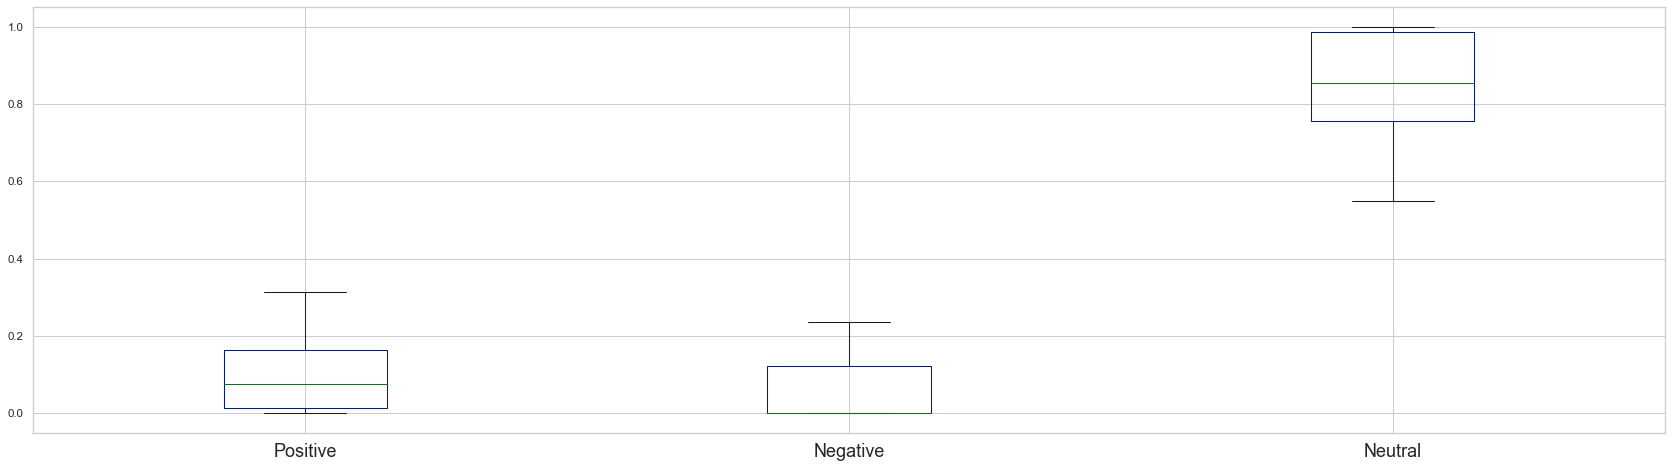

In [ ]:
# visualizing the sentiments in terms of box plot
data[:10].plot(x="Username", y=["Positive", "Negative","Neutral"], kind="box")
plt.show()

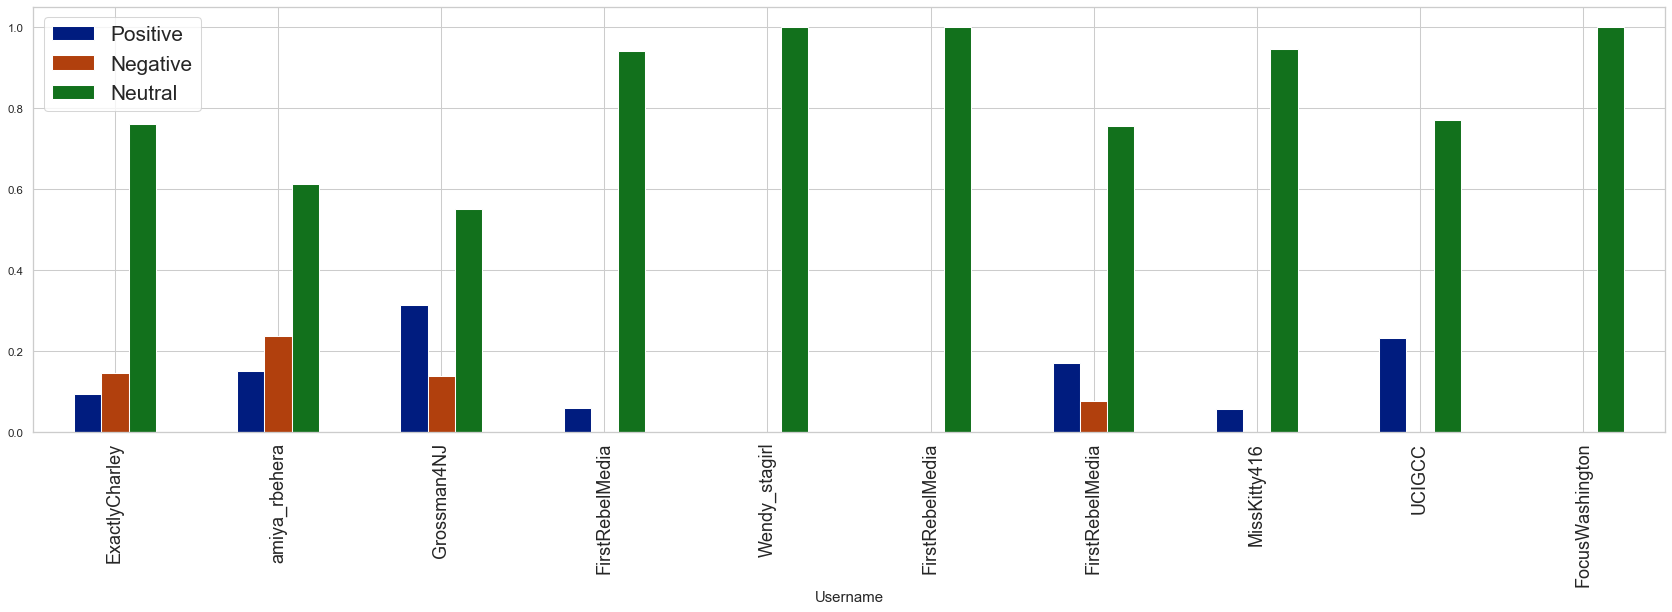

In [ ]:
# visualizing the polarity of sentiments in terms of bar plot
data[:10].plot(x="Username", y=["Positive", "Negative","Neutral"], kind="bar")
plt.show()

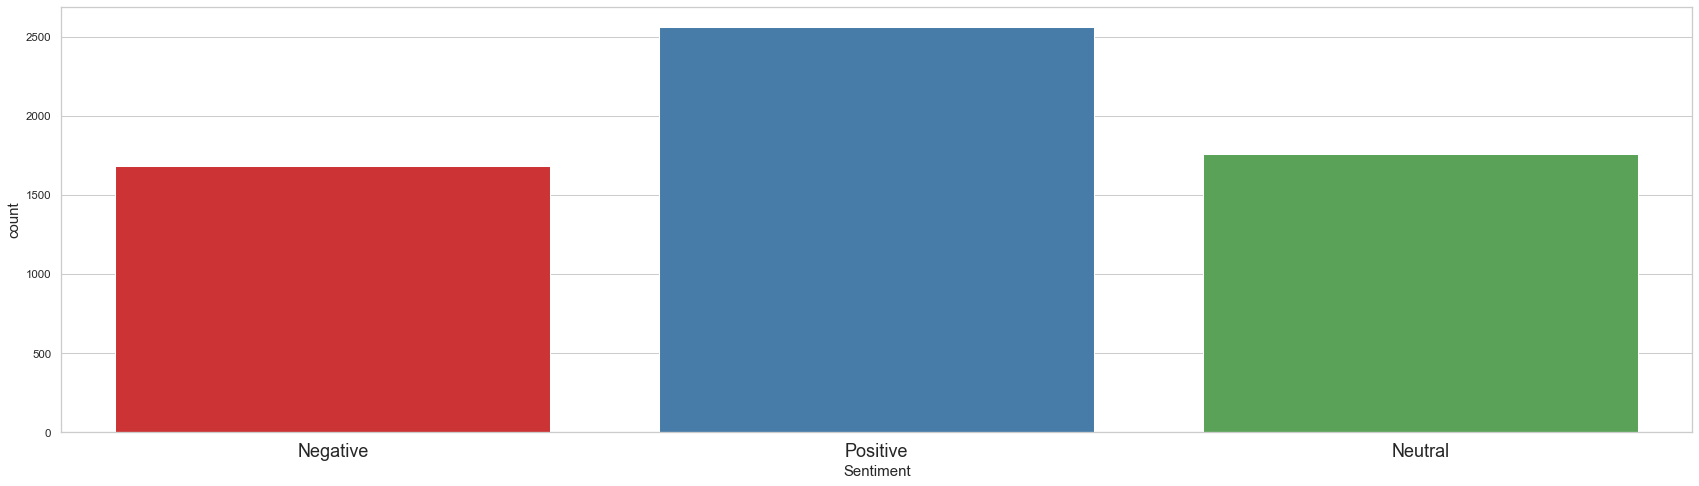

In [ ]:
# visualizing the count of sentiments
bp = sns.countplot(x="Sentiment", data=data, palette="Set1")
plt.show()

In [ ]:
# saving data to csv file
data.to_csv('tweets_sentiment_dataset.csv', encoding='utf-8')

In [ ]:
dataframe = pd.read_csv(r'tweets_sentiment_dataset.csv')

In [ ]:
dataframe

Unnamed: 0  Unnamed: 0.1                  Date_Time  \
0              0             0  2023-01-30 23:51:24+00:00   
1              1             1  2023-01-30 23:48:39+00:00   
2              2             2  2023-01-30 23:45:23+00:00   
3              3             3  2023-01-30 23:41:34+00:00   
4              4             4  2023-01-30 23:36:36+00:00   
...          ...           ...                        ...   
5995        5995          5995  2023-01-05 02:43:21+00:00   
5996        5996          5996  2023-01-05 02:43:11+00:00   
5997        5997          5997  2023-01-05 02:37:57+00:00   
5998        5998          5998  2023-01-05 02:36:21+00:00   
5999        5999          5999  2023-01-05 02:24:41+00:00   

                 Tweet_Id         Username  \
0     1620208085418803201   ExactlyCharley   
1     1620207396202348546    amiya_rbehera   
2     1620206572357193729      Grossman4NJ   
3     1620205611865735168  FirstRebelMedia   
4     1620204362856529920    Wendy_stagirl   
...                   ...              ...   
5995  1610829274369650693  Allison77870479   
5996  1610829232665686021  YvonneC21603701   
5997  1610827917080297472  Michele21612070   
5998  1610827513588244481  Michele21612070   
5999  1610824578967965701   GreenhousEfect   

                                                  Tweet  Polarity  Positive  \
0     we so desperately needed a majority in the con...       0.0     0.093   
1     a party is by definition a faction that is uni...       0.0     0.151   
2     i yes desantis is supported by all republicans...       0.0     0.314   
3     until the students spent  a few years working ...       0.0     0.059   
4     who else needs a paper done before pm my dm is...       0.0     0.000   
...                                                 ...       ...       ...   
5995  marco rubio is a latin like descent on his bod...       0.0     0.333   
5996  midterm elections support rubio he is our futu...       0.0     0.412   
5997  marco rubio is a latin like descent as a latin...       0.0     0.250   
5998  marco rubios call for stronger border security...       0.0     0.155   
5999  democrats fucking steal our elections and then...       0.0     0.069   

      Negative  Neutral  Compound Sentiment  
0        0.146    0.761   -0.2247  Negative  
1        0.236    0.613   -0.6908  Negative  
2        0.137    0.549    0.7269  Positive  
3        0.000    0.941    0.2235  Positive  
4        0.000    1.000    0.0000   Neutral  
...        ...      ...       ...       ...  
5995     0.000    0.667    0.8885  Positive  
5996     0.000    0.588    0.6808  Positive  
5997     0.000    0.750    0.6124  Positive  
5998     0.281    0.564   -0.7249  Negative  
5999     0.291    0.641   -0.8656  Negative  

[6000 rows x 12 columns]

In [ ]:
dataframe.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

Date_Time             Tweet_Id         Username  \
0     2023-01-30 23:51:24+00:00  1620208085418803201   ExactlyCharley   
1     2023-01-30 23:48:39+00:00  1620207396202348546    amiya_rbehera   
2     2023-01-30 23:45:23+00:00  1620206572357193729      Grossman4NJ   
3     2023-01-30 23:41:34+00:00  1620205611865735168  FirstRebelMedia   
4     2023-01-30 23:36:36+00:00  1620204362856529920    Wendy_stagirl   
...                         ...                  ...              ...   
5995  2023-01-05 02:43:21+00:00  1610829274369650693  Allison77870479   
5996  2023-01-05 02:43:11+00:00  1610829232665686021  YvonneC21603701   
5997  2023-01-05 02:37:57+00:00  1610827917080297472  Michele21612070   
5998  2023-01-05 02:36:21+00:00  1610827513588244481  Michele21612070   
5999  2023-01-05 02:24:41+00:00  1610824578967965701   GreenhousEfect   

                                                  Tweet  Polarity  Positive  \
0     we so desperately needed a majority in the con...       0.0     0.093   
1     a party is by definition a faction that is uni...       0.0     0.151   
2     i yes desantis is supported by all republicans...       0.0     0.314   
3     until the students spent  a few years working ...       0.0     0.059   
4     who else needs a paper done before pm my dm is...       0.0     0.000   
...                                                 ...       ...       ...   
5995  marco rubio is a latin like descent on his bod...       0.0     0.333   
5996  midterm elections support rubio he is our futu...       0.0     0.412   
5997  marco rubio is a latin like descent as a latin...       0.0     0.250   
5998  marco rubios call for stronger border security...       0.0     0.155   
5999  democrats fucking steal our elections and then...       0.0     0.069   

      Negative  Neutral  Compound Sentiment  
0        0.146    0.761   -0.2247  Negative  
1        0.236    0.613   -0.6908  Negative  
2        0.137    0.549    0.7269  Positive  
3        0.000    0.941    0.2235  Positive  
4        0.000    1.000    0.0000   Neutral  
...        ...      ...       ...       ...  
5995     0.000    0.667    0.8885  Positive  
5996     0.000    0.588    0.6808  Positive  
5997     0.000    0.750    0.6124  Positive  
5998     0.281    0.564   -0.7249  Negative  
5999     0.291    0.641   -0.8656  Negative  

[6000 rows x 10 columns]

In [ ]:
dataframe = pd.read_csv(r'tweets_sentiment_dataset.csv')

In [ ]:
train_data = dataframe.iloc[:4000,:]
test_data = dataframe.iloc[4000:5000,:]

# Training with different Machine Learning classifiers

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
# Define classifiers
classifiers = [
    ('Multinomial Naive Bayes', MultinomialNB(), {}),
    ('Logistic Regression', LogisticRegression(), {'classifier__C': np.logspace(-4, 4, 20)}),
    ('SVM', SVC(), {'classifier__C': np.logspace(-4, 4, 20)}),
    ('Decision Tree', DecisionTreeClassifier(), {'classifier__max_depth': np.arange(3, 15)}),
    ('Random Forest', RandomForestClassifier(), {'classifier__n_estimators': [10, 50, 100, 200]}),
    ('K-Nearest Neighbors', KNeighborsClassifier(), {'classifier__n_neighbors': np.arange(3, 15)})
]

In [ ]:
X_train = train_data["Tweet"]
y_train = train_data["Sentiment"]
X_test = test_data["Tweet"]
y_test = test_data["Sentiment"]

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
results = pd.DataFrame(columns=['Classifier', 'Training Accuracy', 'Testing Accuracy'], dtype=object)

In [ ]:
# results = pd.DataFrame(columns=['Classifier', 'Training Accuracy', 'Testing Accuracy'])

# Iterating over the classifiers
for name, classifier, _ in classifiers:
    # Creating a pipeline
    pipeline = Pipeline([
        ('vectorizer', vectorizer),
        ('classifier', classifier)
    ])

    # Training the classifier
    pipeline.fit(X_train, y_train)

    # Calculating the training and testing accuracies
    train_acc = accuracy_score(y_train, pipeline.predict(X_train))
    test_acc = accuracy_score(y_test, pipeline.predict(X_test))

    # Appending the results
    results = results.append({'Classifier': name, 'Training Accuracy': float(train_acc), 'Testing Accuracy': float(test_acc)}, ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print(results)

                Classifier  Training Accuracy  Testing Accuracy
0  Multinomial Naive Bayes            0.88925             0.672
1      Logistic Regression            0.99900             0.708
2                      SVM            0.92075             0.665
3            Decision Tree            1.00000             0.596
4            Random Forest            1.00000             0.669
5      K-Nearest Neighbors            0.49025             0.425


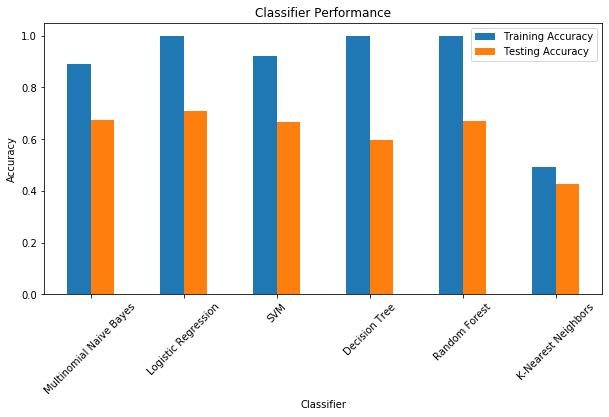

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
results.plot(x='Classifier', y=['Training Accuracy', 'Testing Accuracy'], kind='bar', ax=ax)
ax.set_ylabel('Accuracy')
ax.set_title('Classifier Performance')

plt.xticks(range(len(results['Classifier'])), results['Classifier'], rotation=45)
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.show()

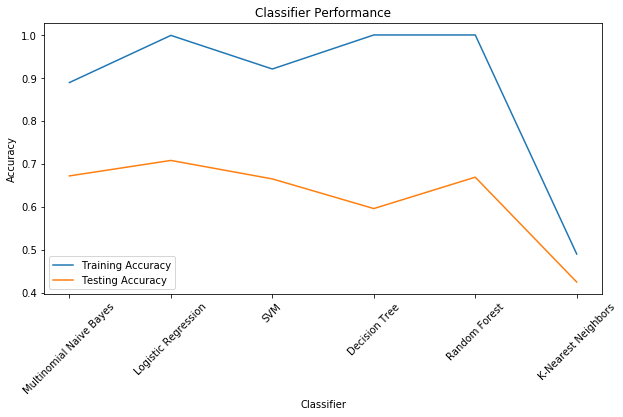

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
results.plot(x='Classifier', y=['Training Accuracy', 'Testing Accuracy'], kind='line', ax=ax)
ax.set_ylabel('Accuracy')
ax.set_title('Classifier Performance')

plt.xticks(range(len(results['Classifier'])), results['Classifier'], rotation=45)
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.show()

In [ ]:
dataframe = pd.read_csv(r'tweets_sentiment_dataset.csv')

In [ ]:
dataframe

Unnamed: 0  Unnamed: 0.1                  Date_Time  \
0              0             0  2023-01-30 23:51:24+00:00   
1              1             1  2023-01-30 23:48:39+00:00   
2              2             2  2023-01-30 23:45:23+00:00   
3              3             3  2023-01-30 23:41:34+00:00   
4              4             4  2023-01-30 23:36:36+00:00   
...          ...           ...                        ...   
5995        5995          5995  2023-01-05 02:43:21+00:00   
5996        5996          5996  2023-01-05 02:43:11+00:00   
5997        5997          5997  2023-01-05 02:37:57+00:00   
5998        5998          5998  2023-01-05 02:36:21+00:00   
5999        5999          5999  2023-01-05 02:24:41+00:00   

                 Tweet_Id         Username  \
0     1620208085418803201   ExactlyCharley   
1     1620207396202348546    amiya_rbehera   
2     1620206572357193729      Grossman4NJ   
3     1620205611865735168  FirstRebelMedia   
4     1620204362856529920    Wendy_stagirl   
...                   ...              ...   
5995  1610829274369650693  Allison77870479   
5996  1610829232665686021  YvonneC21603701   
5997  1610827917080297472  Michele21612070   
5998  1610827513588244481  Michele21612070   
5999  1610824578967965701   GreenhousEfect   

                                                  Tweet  Polarity  Positive  \
0     we so desperately needed a majority in the con...       0.0     0.093   
1     a party is by definition a faction that is uni...       0.0     0.151   
2     i yes desantis is supported by all republicans...       0.0     0.314   
3     until the students spent  a few years working ...       0.0     0.059   
4     who else needs a paper done before pm my dm is...       0.0     0.000   
...                                                 ...       ...       ...   
5995  marco rubio is a latin like descent on his bod...       0.0     0.333   
5996  midterm elections support rubio he is our futu...       0.0     0.412   
5997  marco rubio is a latin like descent as a latin...       0.0     0.250   
5998  marco rubios call for stronger border security...       0.0     0.155   
5999  democrats fucking steal our elections and then...       0.0     0.069   

      Negative  Neutral  Compound Sentiment  
0        0.146    0.761   -0.2247  Negative  
1        0.236    0.613   -0.6908  Negative  
2        0.137    0.549    0.7269  Positive  
3        0.000    0.941    0.2235  Positive  
4        0.000    1.000    0.0000   Neutral  
...        ...      ...       ...       ...  
5995     0.000    0.667    0.8885  Positive  
5996     0.000    0.588    0.6808  Positive  
5997     0.000    0.750    0.6124  Positive  
5998     0.281    0.564   -0.7249  Negative  
5999     0.291    0.641   -0.8656  Negative  

[6000 rows x 12 columns]

In [ ]:
dataframe = dataframe.drop(["Unnamed: 0","Unnamed: 0.1","Polarity"],axis=1)

In [ ]:
dataframe

Date_Time             Tweet_Id         Username  \
0     2023-01-30 23:51:24+00:00  1620208085418803201   ExactlyCharley   
1     2023-01-30 23:48:39+00:00  1620207396202348546    amiya_rbehera   
2     2023-01-30 23:45:23+00:00  1620206572357193729      Grossman4NJ   
3     2023-01-30 23:41:34+00:00  1620205611865735168  FirstRebelMedia   
4     2023-01-30 23:36:36+00:00  1620204362856529920    Wendy_stagirl   
...                         ...                  ...              ...   
5995  2023-01-05 02:43:21+00:00  1610829274369650693  Allison77870479   
5996  2023-01-05 02:43:11+00:00  1610829232665686021  YvonneC21603701   
5997  2023-01-05 02:37:57+00:00  1610827917080297472  Michele21612070   
5998  2023-01-05 02:36:21+00:00  1610827513588244481  Michele21612070   
5999  2023-01-05 02:24:41+00:00  1610824578967965701   GreenhousEfect   

                                                  Tweet  Positive  Negative  \
0     we so desperately needed a majority in the con...     0.093     0.146   
1     a party is by definition a faction that is uni...     0.151     0.236   
2     i yes desantis is supported by all republicans...     0.314     0.137   
3     until the students spent  a few years working ...     0.059     0.000   
4     who else needs a paper done before pm my dm is...     0.000     0.000   
...                                                 ...       ...       ...   
5995  marco rubio is a latin like descent on his bod...     0.333     0.000   
5996  midterm elections support rubio he is our futu...     0.412     0.000   
5997  marco rubio is a latin like descent as a latin...     0.250     0.000   
5998  marco rubios call for stronger border security...     0.155     0.281   
5999  democrats fucking steal our elections and then...     0.069     0.291   

      Neutral  Compound Sentiment  
0       0.761   -0.2247  Negative  
1       0.613   -0.6908  Negative  
2       0.549    0.7269  Positive  
3       0.941    0.2235  Positive  
4       1.000    0.0000   Neutral  
...       ...       ...       ...  
5995    0.667    0.8885  Positive  
5996    0.588    0.6808  Positive  
5997    0.750    0.6124  Positive  
5998    0.564   -0.7249  Negative  
5999    0.641   -0.8656  Negative  

[6000 rows x 9 columns]

# Confusion matrix for sentiment data

In [ ]:
# splitting the dataframe in training and testing subsets
train_data = dataframe.iloc[:4000,:]
test_data = dataframe.iloc[4000:5000,:]

In [ ]:
# Split data into training and testing sets
X_train = train_data["Tweet"]
y_train = train_data["Sentiment"]
X_test = test_data["Tweet"]
y_test = test_data["Sentiment"]

In [ ]:
# Define classifiers
classifiers = [
    ('Multinomial Naive Bayes', MultinomialNB(), {}),
    ('Logistic Regression', LogisticRegression(), {'classifier__C': np.logspace(-4, 4, 20)}),
    ('SVM', SVC(), {'classifier__C': np.logspace(-4, 4, 20)}),
    ('Decision Tree', DecisionTreeClassifier(), {'classifier__max_depth': np.arange(3, 15)}),
    ('Random Forest', RandomForestClassifier(), {'classifier__n_estimators': [10, 50, 100, 200]}),
    ('K-Nearest Neighbors', KNeighborsClassifier(), {'classifier__n_neighbors': np.arange(3, 15)})
]

In [ ]:
# Initialize results
train_accuracies = []
test_accuracies = []
classifier_names = []

Processing Multinomial Naive Bayes...
Multinomial Naive Bayes - Confusion Matrix:
[[ 96  10 162]
 [ 24  63 182]
 [  7   4 452]]


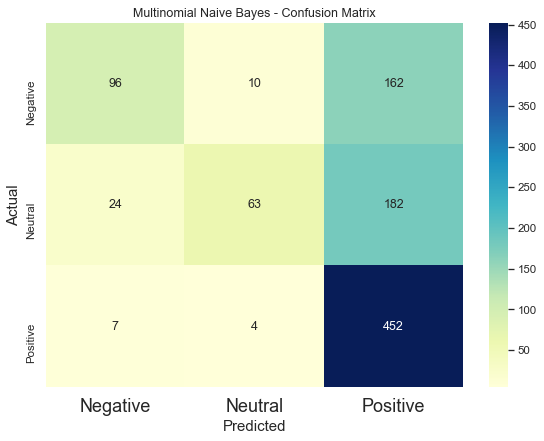

Processing Logistic Regression...
Logistic Regression - Confusion Matrix:
[[164  36  68]
 [ 35 169  65]
 [ 30  46 387]]


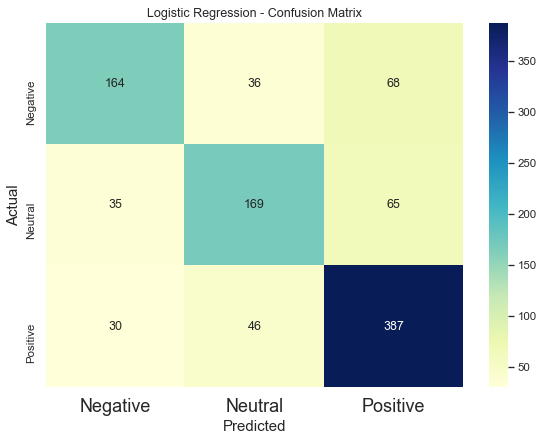

Processing SVM...
SVM - Confusion Matrix:
[[161  23  84]
 [ 36 150  83]
 [ 26  41 396]]


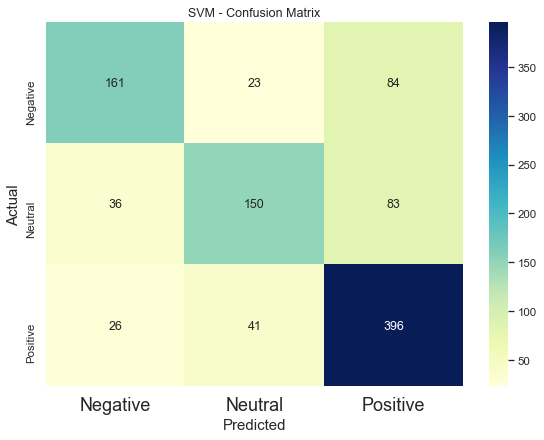

Processing Decision Tree...
Decision Tree - Confusion Matrix:
[[ 74 113  81]
 [ 21 199  49]
 [ 46 151 266]]


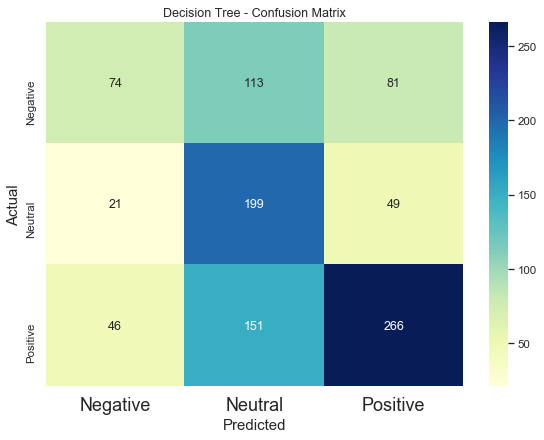

Processing Random Forest...
Random Forest - Confusion Matrix:
[[ 96  61 111]
 [ 22 176  71]
 [ 10  73 380]]


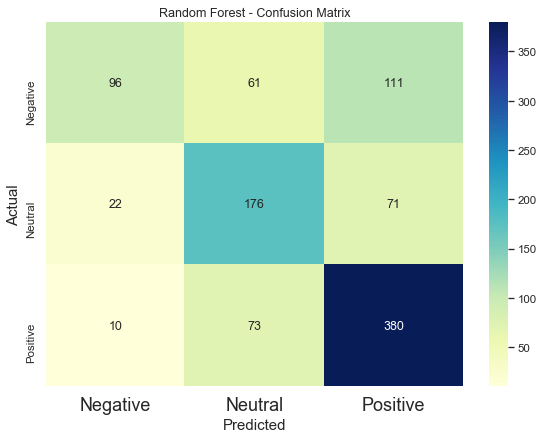

Processing K-Nearest Neighbors...
K-Nearest Neighbors - Confusion Matrix:
[[124  46  98]
 [ 45 130  94]
 [ 51  74 338]]


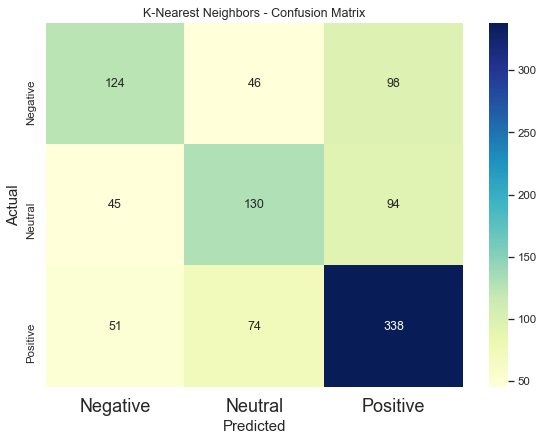

In [ ]:
# Iterate through classifiers
for name, classifier, params in classifiers:
    classifier_names.append(name)
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('classifier', classifier)
    ])
    
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    # Get the best model
    best_model = grid_search.best_estimator_
    
    # Train accuracy
    y_train_pred = best_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Test accuracy
    y_test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)
    
    print(f"Processing {name}...")
    
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"{name} - Confusion Matrix:\n{cm}")

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# More Ensemble methods implementation apart from Random Forests

In [ ]:
# Bagging with Decision Trees as base estimator
bagging_classifier = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# AdaBoost with Decision Trees as base estimator
adaboost_classifier = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=100,
    random_state=42
)

# Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=[
        ('logistic_regression', LogisticRegression()),
        ('svm', SVC(probability=True)),
        ('knn', KNeighborsClassifier())
    ],
    final_estimator=LogisticRegression(),
    n_jobs=-1
)

# List of ensemble classifiers
ensemble_classifiers = [
    ('Bagging', bagging_classifier),
    ('AdaBoost', adaboost_classifier),
    ('Stacking', stacking_classifier)
]

In [ ]:
# Initialize results
ensemble_train_accuracies = []
ensemble_test_accuracies = []
ensemble_classifier_names = []

Bagging - Train accuracy: 1.0
Bagging - Test accuracy: 0.643
Bagging - Confusion Matrix:
[[105  73  90]
 [ 17 191  61]
 [ 24  92 347]]


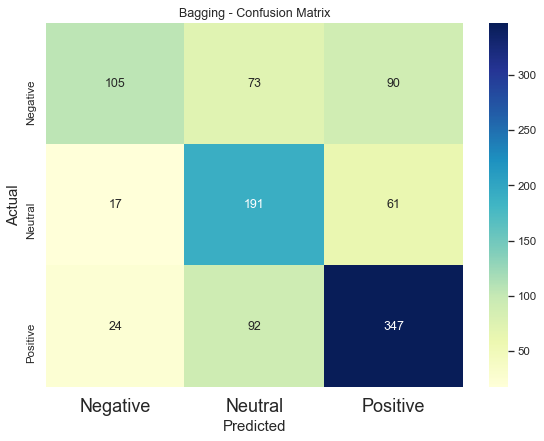

AdaBoost - Train accuracy: 0.8685
AdaBoost - Test accuracy: 0.623
AdaBoost - Confusion Matrix:
[[138  53  77]
 [ 30 175  64]
 [ 59  94 310]]


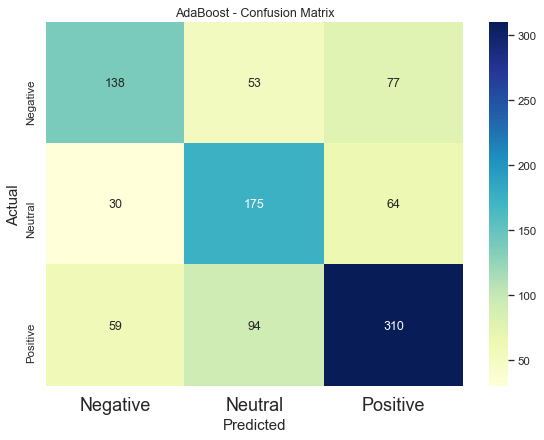

Stacking - Train accuracy: 0.96675
Stacking - Test accuracy: 0.693
Stacking - Confusion Matrix:
[[169  25  74]
 [ 44 150  75]
 [ 47  42 374]]


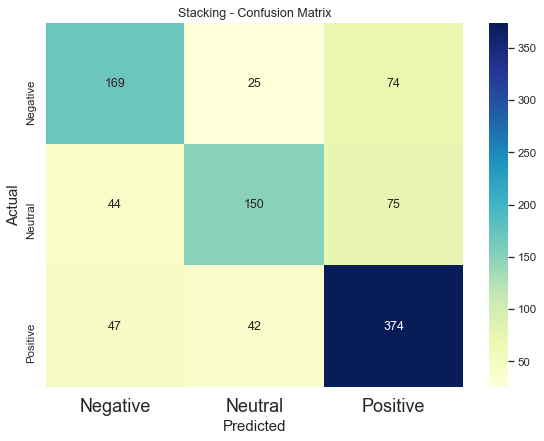

In [ ]:
# Iterate through ensemble classifiers
for name, classifier in ensemble_classifiers:
    ensemble_classifier_names.append(name)
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('classifier', classifier)
    ])
    
    pipeline.fit(X_train, y_train)
    
    # Train accuracy
    y_train_pred = pipeline.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    ensemble_train_accuracies.append(train_accuracy)
    
    # Test accuracy
    y_test_pred = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    ensemble_test_accuracies.append(test_accuracy)
    
    print(f"{name} - Train accuracy: {train_accuracy}")
    print(f"{name} - Test accuracy: {test_accuracy}")
    
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"{name} - Confusion Matrix:\n{cm}")

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

In [ ]:
print(f"Length of ensemble_classifier_names: {len(ensemble_classifier_names)}")
print(f"Length of ensemble_train_accuracies: {len(ensemble_train_accuracies)}")
print(f"Length of ensemble_test_accuracies: {len(ensemble_test_accuracies)}")

Length of ensemble_classifier_names: 3
Length of ensemble_train_accuracies: 3
Length of ensemble_test_accuracies: 3


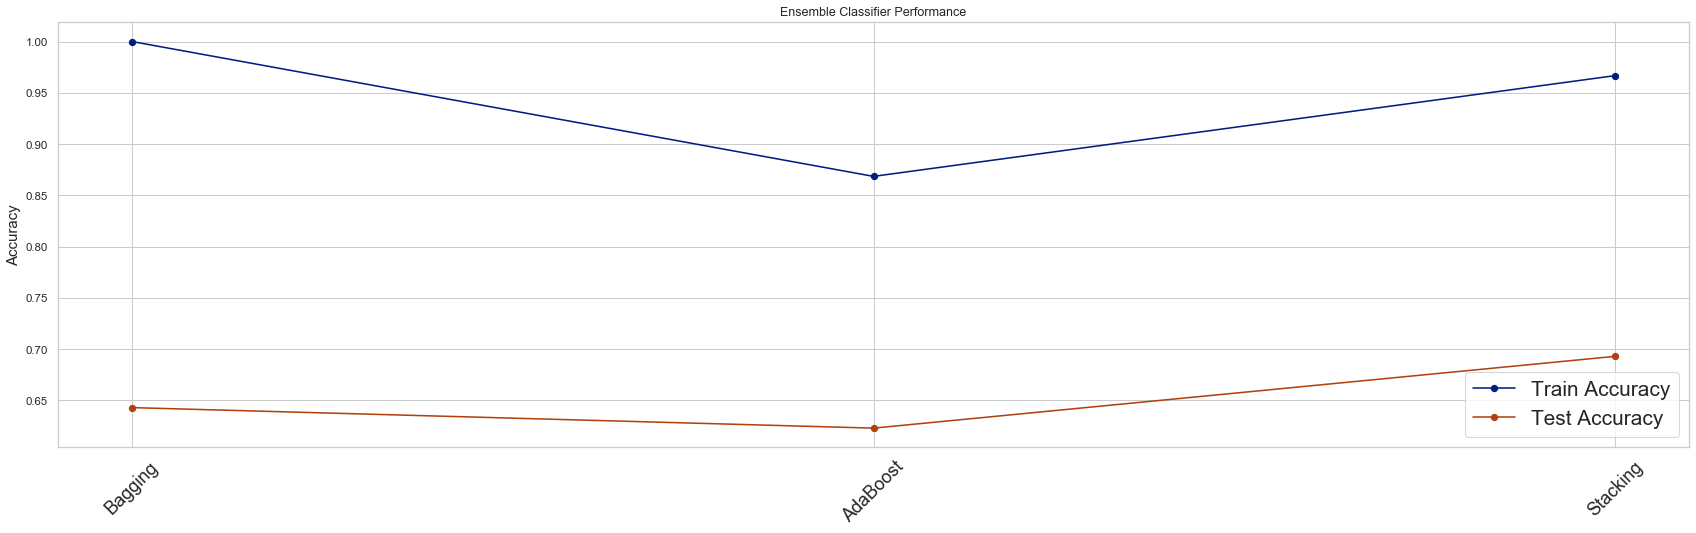

In [ ]:
fig, ax = plt.subplots()
x = np.arange(len(ensemble_classifier_names))

# Plot the train and test accuracies as lines
ax.plot(x, ensemble_train_accuracies, label='Train Accuracy', marker='o')
ax.plot(x, ensemble_test_accuracies, label='Test Accuracy', marker='o')

# Set x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(ensemble_classifier_names, rotation=45)

# Add legend, labels, and title
ax.legend()
plt.ylabel('Accuracy')
plt.title('Ensemble Classifier Performance')

# Show the plot
plt.show()

# Prevent overfitting using Bagging Classifier

In [ ]:
# Initialize results
ensemble_train_param_accuracies = []
ensemble_test_param_accuracies = []
ensemble_classifier_param_names = []

In [ ]:
from sklearn.tree import DecisionTreeClassifier

bagging_classifier = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', bagging_classifier)
])

param_grid = {
    'classifier__base_estimator__max_depth': [2, 5, 10, 15],
    'classifier__n_estimators': [10, 50, 100, 200]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'classifier__base_estimator__max_depth': 15, 'classifier__n_estimators': 50}


In [ ]:
# Train with the best hyperparameters
best_pipeline = grid_search.best_estimator_

# Train accuracy
y_train_pred = best_pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Test accuracy
y_test_pred = best_pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Bagging - Train accuracy: {train_accuracy}")
print(f"Bagging - Test accuracy: {test_accuracy}")

Bagging - Train accuracy: 0.76525
Bagging - Test accuracy: 0.596


# Prevent overfitting using AdaBoost Classifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost with Decision Trees as base estimator
adaboost_classifier = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', adaboost_classifier)
])

param_grid = {
    'classifier__base_estimator__max_depth': [1, 2, 3, 4, 5],
    'classifier__n_estimators': [50, 100, 150, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.5, 1],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'classifier__base_estimator__max_depth': 2, 'classifier__learning_rate': 0.1, 'classifier__n_estimators': 150}


In [ ]:
# Train with the best hyperparameters
best_pipeline = grid_search.best_estimator_

# Train accuracy
y_train_pred = best_pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Test accuracy
y_test_pred = best_pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"AdaBoost - Train accuracy: {train_accuracy}")
print(f"AdaBoost - Test accuracy: {test_accuracy}")

AdaBoost - Train accuracy: 0.78175
AdaBoost - Test accuracy: 0.674


# Prevent overfitting using Stacking Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

# Base estimators
log_reg = LogisticRegression()
knn = KNeighborsClassifier()

# Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=[
        ('logistic_regression', log_reg),
        ('knn', knn)
    ],
    final_estimator=LogisticRegression(),
    n_jobs=-1
)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', stacking_classifier)
])

param_grid = {
    'classifier__logistic_regression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__knn__n_neighbors': [3, 5, 7, 9, 11],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'classifier__knn__n_neighbors': 7, 'classifier__logistic_regression__C': 10}


In [ ]:
# Train with the best hyperparameters
best_pipeline = grid_search.best_estimator_

# Train accuracy
y_train_pred = best_pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Test accuracy
y_test_pred = best_pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Stacking - Train accuracy: {train_accuracy}")
print(f"Stacking - Test accuracy: {test_accuracy}")

Stacking - Train accuracy: 0.99975
Stacking - Test accuracy: 0.72


# Plotting all ensemble methods after implementing hyperparamter tuning

In [ ]:
classifier_names = ['Bagging', 'AdaBoost', 'Stacking']
train_accuracies = [0.76525, 0.78175, 0.99975]
test_accuracies = [0.596, 0.674, 0.72]

In [ ]:
x = np.arange(len(classifier_names))

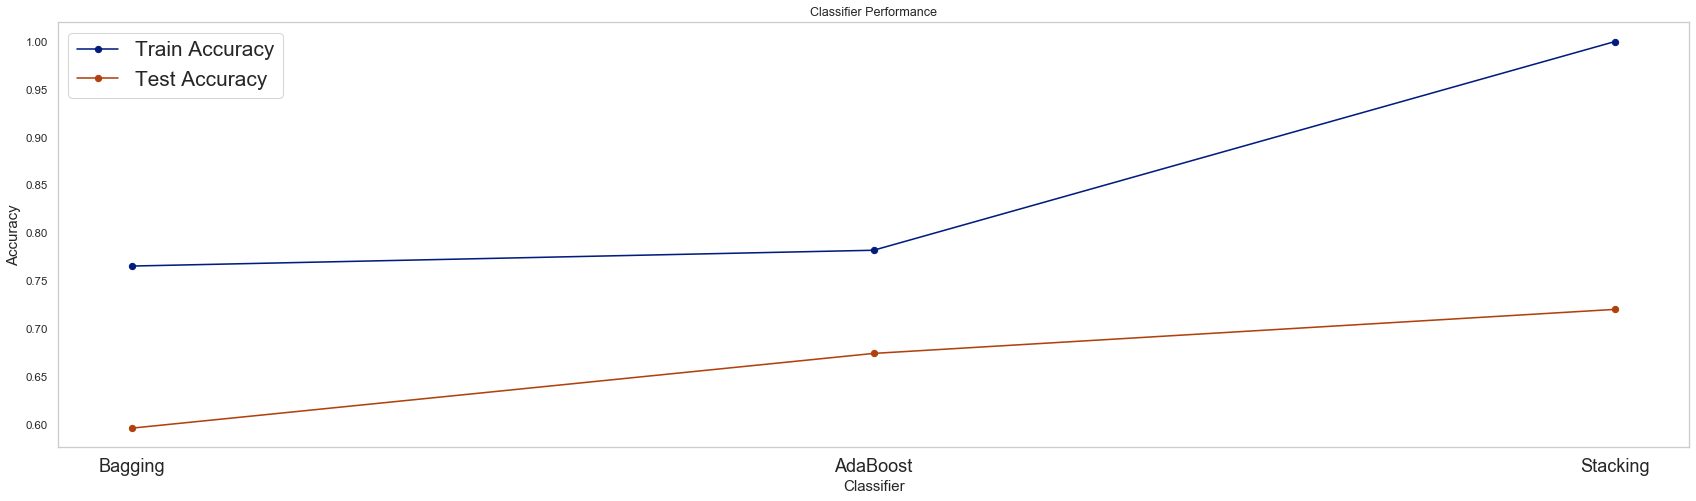

In [ ]:
plt.plot(x, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(x, test_accuracies, marker='o', label='Test Accuracy')

plt.xticks(x, classifier_names)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Performance')
plt.legend()
plt.grid()
plt.show()

In [ ]:
y_pred = Detoxify('multilingual')

In [ ]:
toxic_em_df = dataframe["Tweet"]

In [ ]:
dataframe["Toxic Text Label"] = [y_pred.predict(x) for x in toxic_em_df]
dataframe.head(10)

Date_Time             Tweet_Id         Username  \
0  2023-01-30 23:51:24+00:00  1620208085418803201   ExactlyCharley   
1  2023-01-30 23:48:39+00:00  1620207396202348546    amiya_rbehera   
2  2023-01-30 23:45:23+00:00  1620206572357193729      Grossman4NJ   
3  2023-01-30 23:41:34+00:00  1620205611865735168  FirstRebelMedia   
4  2023-01-30 23:36:36+00:00  1620204362856529920    Wendy_stagirl   
5  2023-01-30 23:31:30+00:00  1620203078350950402  FirstRebelMedia   
6  2023-01-30 23:16:02+00:00  1620199187844599808  FirstRebelMedia   
7  2023-01-30 23:03:43+00:00  1620196086840283136     MissKitty416   
8  2023-01-30 23:00:32+00:00  1620195287305265152           UCIGCC   
9  2023-01-30 22:57:53+00:00  1620194618108436481  FocusWashington   

                                               Tweet  Positive  Negative  \
0  we so desperately needed a majority in the con...     0.093     0.146   
1  a party is by definition a faction that is uni...     0.151     0.236   
2  i yes desantis is supported by all republicans...     0.314     0.137   
3  until the students spent  a few years working ...     0.059     0.000   
4  who else needs a paper done before pm my dm is...     0.000     0.000   
5  thats going to be another bs case an attempt t...     0.000     0.000   
6  she would make a good vp first but we need tru...     0.169     0.077   
7  lks  i want to bring your attention to the cor...     0.056     0.000   
8  future of democracy expert ther ucsd and ush  ...     0.231     0.000   
9  democrats rev abortion advertising back up for...     0.000     0.000   

   Neutral  Compound Sentiment  \
0    0.761   -0.2247  Negative   
1    0.613   -0.6908  Negative   
2    0.549    0.7269  Positive   
3    0.941    0.2235  Positive   
4    1.000    0.0000   Neutral   
5    1.000    0.0000   Neutral   
6    0.754    0.5794  Positive   
7    0.944    0.0772  Positive   
8    0.769    0.7184  Positive   
9    1.000    0.0000   Neutral   

                                    Toxic Text Label  
0  {'toxicity': 0.65607345, 'severe_toxicity': 0....  
1  {'toxicity': 0.00075411174, 'severe_toxicity':...  
2  {'toxicity': 0.0021011902, 'severe_toxicity': ...  
3  {'toxicity': 0.0006463111, 'severe_toxicity': ...  
4  {'toxicity': 0.0012389501, 'severe_toxicity': ...  
5  {'toxicity': 0.00045926718, 'severe_toxicity':...  
6  {'toxicity': 0.00414801, 'severe_toxicity': 1....  
7  {'toxicity': 0.0019895914, 'severe_toxicity': ...  
8  {'toxicity': 0.0008894475, 'severe_toxicity': ...  
9  {'toxicity': 0.018093515, 'severe_toxicity': 4...

In [ ]:
dataframe.head(5)

Date_Time             Tweet_Id         Username  \
0  2023-01-30 23:51:24+00:00  1620208085418803201   ExactlyCharley   
1  2023-01-30 23:48:39+00:00  1620207396202348546    amiya_rbehera   
2  2023-01-30 23:45:23+00:00  1620206572357193729      Grossman4NJ   
3  2023-01-30 23:41:34+00:00  1620205611865735168  FirstRebelMedia   
4  2023-01-30 23:36:36+00:00  1620204362856529920    Wendy_stagirl   

                                               Tweet  Positive  Negative  \
0  we so desperately needed a majority in the con...     0.093     0.146   
1  a party is by definition a faction that is uni...     0.151     0.236   
2  i yes desantis is supported by all republicans...     0.314     0.137   
3  until the students spent  a few years working ...     0.059     0.000   
4  who else needs a paper done before pm my dm is...     0.000     0.000   

   Neutral  Compound Sentiment  \
0    0.761   -0.2247  Negative   
1    0.613   -0.6908  Negative   
2    0.549    0.7269  Positive   
3    0.941    0.2235  Positive   
4    1.000    0.0000   Neutral   

                                    Toxic Text Label  
0  {'toxicity': 0.65607345, 'severe_toxicity': 0....  
1  {'toxicity': 0.00075411174, 'severe_toxicity':...  
2  {'toxicity': 0.0021011902, 'severe_toxicity': ...  
3  {'toxicity': 0.0006463111, 'severe_toxicity': ...  
4  {'toxicity': 0.0012389501, 'severe_toxicity': ...

In [ ]:
#text to emotion 
import text2emotion as te

In [ ]:
# em_data = dataframe["Tweet"]
emotion_data = dataframe

In [ ]:
# analyzing the emotions of tweens and adding them to the dataframe
emotion_data["Emotion"] = [te.get_emotion(i) for i in dataframe['Tweet']]

In [ ]:
emotion_data.head()

Date_Time             Tweet_Id         Username  \
0  2023-01-30 23:51:24+00:00  1620208085418803201   ExactlyCharley   
1  2023-01-30 23:48:39+00:00  1620207396202348546    amiya_rbehera   
2  2023-01-30 23:45:23+00:00  1620206572357193729      Grossman4NJ   
3  2023-01-30 23:41:34+00:00  1620205611865735168  FirstRebelMedia   
4  2023-01-30 23:36:36+00:00  1620204362856529920    Wendy_stagirl   

                                               Tweet  Positive  Negative  \
0  we so desperately needed a majority in the con...     0.093     0.146   
1  a party is by definition a faction that is uni...     0.151     0.236   
2  i yes desantis is supported by all republicans...     0.314     0.137   
3  until the students spent  a few years working ...     0.059     0.000   
4  who else needs a paper done before pm my dm is...     0.000     0.000   

   Neutral  Compound Sentiment  \
0    0.761   -0.2247  Negative   
1    0.613   -0.6908  Negative   
2    0.549    0.7269  Positive   
3    0.941    0.2235  Positive   
4    1.000    0.0000   Neutral   

                                    Toxic Text Label  \
0  {'toxicity': 0.65607345, 'severe_toxicity': 0....   
1  {'toxicity': 0.00075411174, 'severe_toxicity':...   
2  {'toxicity': 0.0021011902, 'severe_toxicity': ...   
3  {'toxicity': 0.0006463111, 'severe_toxicity': ...   
4  {'toxicity': 0.0012389501, 'severe_toxicity': ...   

                                             Emotion  
0  {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.2, ...  
1  {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.17,...  
2  {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.33,...  
3  {'Happy': 0.0, 'Angry': 0.2, 'Surprise': 0.0, ...  
4  {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...

In [ ]:
toxic_em_df = pd.DataFrame(dataframe["Toxic Text Label"].values.tolist(), index=dataframe.index)

In [ ]:
emotion_em_df = pd.DataFrame(dataframe["Emotion"].values.tolist(), index=dataframe.index)

In [ ]:
toxic_em_df.head()

toxicity  severe_toxicity   obscene  identity_attack    insult    threat  \
0  0.656073         0.001051  0.385869         0.001050  0.076037  0.000468   
1  0.000754         0.000018  0.000119         0.000097  0.000356  0.000024   
2  0.002101         0.000012  0.000097         0.000104  0.000887  0.000020   
3  0.000646         0.000017  0.000102         0.000115  0.000250  0.000026   
4  0.001239         0.000038  0.000345         0.000201  0.000391  0.000068   

   sexual_explicit  
0         0.002299  
1         0.000016  
2         0.000017  
3         0.000019  
4         0.000035

In [ ]:
emotion_em_df.head()

Happy  Angry  Surprise   Sad  Fear
0    0.0    0.0      0.20  0.20  0.60
1    0.0    0.0      0.17  0.17  0.67
2    0.0    0.0      0.33  0.33  0.33
3    0.0    0.2      0.00  0.20  0.60
4    0.0    0.0      0.00  0.00  1.00

In [ ]:
dataframe_final = dataframe

In [ ]:
dataframe_final.drop(["Positive","Negative","Neutral","Compound","Toxic Text Label","Emotion"],axis=1)

Date_Time             Tweet_Id         Username  \
0     2023-01-30 23:51:24+00:00  1620208085418803201   ExactlyCharley   
1     2023-01-30 23:48:39+00:00  1620207396202348546    amiya_rbehera   
2     2023-01-30 23:45:23+00:00  1620206572357193729      Grossman4NJ   
3     2023-01-30 23:41:34+00:00  1620205611865735168  FirstRebelMedia   
4     2023-01-30 23:36:36+00:00  1620204362856529920    Wendy_stagirl   
...                         ...                  ...              ...   
5995  2023-01-05 02:43:21+00:00  1610829274369650693  Allison77870479   
5996  2023-01-05 02:43:11+00:00  1610829232665686021  YvonneC21603701   
5997  2023-01-05 02:37:57+00:00  1610827917080297472  Michele21612070   
5998  2023-01-05 02:36:21+00:00  1610827513588244481  Michele21612070   
5999  2023-01-05 02:24:41+00:00  1610824578967965701   GreenhousEfect   

                                                  Tweet Sentiment  
0     we so desperately needed a majority in the con...  Negative  
1     a party is by definition a faction that is uni...  Negative  
2     i yes desantis is supported by all republicans...  Positive  
3     until the students spent  a few years working ...  Positive  
4     who else needs a paper done before pm my dm is...   Neutral  
...                                                 ...       ...  
5995  marco rubio is a latin like descent on his bod...  Positive  
5996  midterm elections support rubio he is our futu...  Positive  
5997  marco rubio is a latin like descent as a latin...  Positive  
5998  marco rubios call for stronger border security...  Negative  
5999  democrats fucking steal our elections and then...  Negative  

[6000 rows x 5 columns]

# Feature Engineering

In [ ]:
dataframe_final["Happy"] = emotion_em_df["Happy"]
dataframe_final["Angry"] = emotion_em_df["Angry"]
dataframe_final["Surprise"] = emotion_em_df["Surprise"]
dataframe_final["Sad"] = emotion_em_df["Sad"]
dataframe_final["Fear"] = emotion_em_df["Fear"]
dataframe_final["toxicity"] = toxic_em_df["toxicity"]
dataframe_final["severe_toxicity"] = toxic_em_df["severe_toxicity"]
dataframe_final["obscene"] = toxic_em_df["obscene"]
dataframe_final["identity_attack"] = toxic_em_df["identity_attack"]
dataframe_final["insult"] = toxic_em_df["insult"]
dataframe_final["threat"] = toxic_em_df["threat"]
dataframe_final["sexual_explicit"] = toxic_em_df["sexual_explicit"]

In [ ]:
dataframe_final = dataframe_final.drop(["Emotion"],axis=1)

In [ ]:
dataframe_final.head()

Date_Time             Tweet_Id         Username  \
0  2023-01-30 23:51:24+00:00  1620208085418803201   ExactlyCharley   
1  2023-01-30 23:48:39+00:00  1620207396202348546    amiya_rbehera   
2  2023-01-30 23:45:23+00:00  1620206572357193729      Grossman4NJ   
3  2023-01-30 23:41:34+00:00  1620205611865735168  FirstRebelMedia   
4  2023-01-30 23:36:36+00:00  1620204362856529920    Wendy_stagirl   

                                               Tweet Sentiment  Happy  Angry  \
0  we so desperately needed a majority in the con...  Negative    0.0    0.0   
1  a party is by definition a faction that is uni...  Negative    0.0    0.0   
2  i yes desantis is supported by all republicans...  Positive    0.0    0.0   
3  until the students spent  a few years working ...  Positive    0.0    0.2   
4  who else needs a paper done before pm my dm is...   Neutral    0.0    0.0   

   Surprise   Sad  Fear  toxicity  severe_toxicity   obscene  identity_attack  \
0      0.20  0.20  0.60  0.656073         0.001051  0.385869         0.001050   
1      0.17  0.17  0.67  0.000754         0.000018  0.000119         0.000097   
2      0.33  0.33  0.33  0.002101         0.000012  0.000097         0.000104   
3      0.00  0.20  0.60  0.000646         0.000017  0.000102         0.000115   
4      0.00  0.00  1.00  0.001239         0.000038  0.000345         0.000201   

     insult    threat  sexual_explicit  
0  0.076037  0.000468         0.002299  
1  0.000356  0.000024         0.000016  
2  0.000887  0.000020         0.000017  
3  0.000250  0.000026         0.000019  
4  0.000391  0.000068         0.000035

In [ ]:
dataframe_final.drop(["Tweet_Id"],axis=1).corr()

Happy     Angry  Surprise       Sad      Fear  toxicity  \
Happy            1.000000 -0.051310 -0.137044 -0.108057 -0.202661 -0.026134   
Angry           -0.051310  1.000000 -0.058039 -0.042206 -0.118033  0.042822   
Surprise        -0.137044 -0.058039  1.000000 -0.139589 -0.247532  0.075292   
Sad             -0.108057 -0.042206 -0.139589  1.000000 -0.264239  0.081527   
Fear            -0.202661 -0.118033 -0.247532 -0.264239  1.000000 -0.030912   
toxicity        -0.026134  0.042822  0.075292  0.081527 -0.030912  1.000000   
severe_toxicity  0.016323 -0.011614  0.027460 -0.003009 -0.023057  0.218494   
obscene          0.019997 -0.003458  0.037363  0.000624 -0.011977  0.440522   
identity_attack  0.014186 -0.011231  0.015808  0.029110 -0.023865  0.263163   
insult          -0.026685  0.041820  0.051461  0.084603 -0.031637  0.910356   
threat          -0.005218 -0.006687  0.044444  0.009792 -0.017397  0.144666   
sexual_explicit  0.021282 -0.006935  0.017714  0.007234 -0.003759  0.268321   

                 severe_toxicity   obscene  identity_attack    insult  \
Happy                   0.016323  0.019997         0.014186 -0.026685   
Angry                  -0.011614 -0.003458        -0.011231  0.041820   
Surprise                0.027460  0.037363         0.015808  0.051461   
Sad                    -0.003009  0.000624         0.029110  0.084603   
Fear                   -0.023057 -0.011977        -0.023865 -0.031637   
toxicity                0.218494  0.440522         0.263163  0.910356   
severe_toxicity         1.000000  0.601077         0.129711  0.209319   
obscene                 0.601077  1.000000         0.114854  0.286058   
identity_attack         0.129711  0.114854         1.000000  0.095811   
insult                  0.209319  0.286058         0.095811  1.000000   
threat                  0.069890  0.047282         0.099904  0.032866   
sexual_explicit         0.291864  0.391498         0.024165  0.127942   

                   threat  sexual_explicit  
Happy           -0.005218         0.021282  
Angry           -0.006687        -0.006935  
Surprise         0.044444         0.017714  
Sad              0.009792         0.007234  
Fear            -0.017397        -0.003759  
toxicity         0.144666         0.268321  
severe_toxicity  0.069890         0.291864  
obscene          0.047282         0.391498  
identity_attack  0.099904         0.024165  
insult           0.032866         0.127942  
threat           1.000000         0.052238  
sexual_explicit  0.052238         1.000000

# Logic on predicting whether a tweet represents hatred or not

In [ ]:
# defining a function to calculate the union probabilities
def union_probability(prob_list):
    complement_prob = 1
    for prob in prob_list:
        complement_prob *= (1 - prob)
    return 1 - complement_prob


# applying the function to the dataframe to calculate the union probabilities
dataframe_final['Hatred_Probability'] = dataframe_final.apply(lambda row: union_probability(row[['Angry', 'toxicity', 'severe_toxicity', 'obscene', 'identity_attack','insult','threat','sexual_explicit']]), axis=1)
dataframe_final['Non_Hatred_Probability'] = dataframe_final.apply(lambda row: union_probability(row[['Happy', 'Surprise', 'Sad', 'Fear']]), axis=1)

In [ ]:
dataframe_final.head()

Date_Time             Tweet_Id         Username  \
0  2023-01-30 23:51:24+00:00  1620208085418803201   ExactlyCharley   
1  2023-01-30 23:48:39+00:00  1620207396202348546    amiya_rbehera   
2  2023-01-30 23:45:23+00:00  1620206572357193729      Grossman4NJ   
3  2023-01-30 23:41:34+00:00  1620205611865735168  FirstRebelMedia   
4  2023-01-30 23:36:36+00:00  1620204362856529920    Wendy_stagirl   

                                               Tweet Sentiment  Happy  Angry  \
0  we so desperately needed a majority in the con...  Negative    0.0    0.0   
1  a party is by definition a faction that is uni...  Negative    0.0    0.0   
2  i yes desantis is supported by all republicans...  Positive    0.0    0.0   
3  until the students spent  a few years working ...  Positive    0.0    0.2   
4  who else needs a paper done before pm my dm is...   Neutral    0.0    0.0   

   Surprise   Sad  Fear  toxicity  severe_toxicity   obscene  identity_attack  \
0      0.20  0.20  0.60  0.656073         0.001051  0.385869         0.001050   
1      0.17  0.17  0.67  0.000754         0.000018  0.000119         0.000097   
2      0.33  0.33  0.33  0.002101         0.000012  0.000097         0.000104   
3      0.00  0.20  0.60  0.000646         0.000017  0.000102         0.000115   
4      0.00  0.00  1.00  0.001239         0.000038  0.000345         0.000201   

     insult    threat  sexual_explicit  Hatred_Probability  \
0  0.076037  0.000468         0.002299            0.805793   
1  0.000356  0.000024         0.000016            0.001383   
2  0.000887  0.000020         0.000017            0.003235   
3  0.000250  0.000026         0.000019            0.200940   
4  0.000391  0.000068         0.000035            0.002315   

   Non_Hatred_Probability  
0                0.744000  
1                0.772663  
2                0.699237  
3                0.680000  
4                1.000000

In [ ]:
dataframe_final['Tweet Category'] = dataframe_final.apply(lambda row: 'Hatred' if row['Hatred_Probability'] > row['Non_Hatred_Probability'] else 'Non Hatred', axis=1)

In [ ]:
# Getting the list of columns
columns = list(dataframe_final.columns)

# Removing 'Tweet Category' from the list
columns.remove('Tweet Category')

# Appending 'Tweet Category' to the end of the list
columns.append('Tweet Category')

# Reordering the DataFrame based on the updated column list
dataframe_final = dataframe_final[columns]

In [ ]:
dataframe_final.head()

Date_Time             Tweet_Id         Username  \
0  2023-01-30 23:51:24+00:00  1620208085418803201   ExactlyCharley   
1  2023-01-30 23:48:39+00:00  1620207396202348546    amiya_rbehera   
2  2023-01-30 23:45:23+00:00  1620206572357193729      Grossman4NJ   
3  2023-01-30 23:41:34+00:00  1620205611865735168  FirstRebelMedia   
4  2023-01-30 23:36:36+00:00  1620204362856529920    Wendy_stagirl   

                                               Tweet Sentiment  Happy  Angry  \
0  we so desperately needed a majority in the con...  Negative    0.0    0.0   
1  a party is by definition a faction that is uni...  Negative    0.0    0.0   
2  i yes desantis is supported by all republicans...  Positive    0.0    0.0   
3  until the students spent  a few years working ...  Positive    0.0    0.2   
4  who else needs a paper done before pm my dm is...   Neutral    0.0    0.0   

   Surprise   Sad  Fear  toxicity  severe_toxicity   obscene  identity_attack  \
0      0.20  0.20  0.60  0.656073         0.001051  0.385869         0.001050   
1      0.17  0.17  0.67  0.000754         0.000018  0.000119         0.000097   
2      0.33  0.33  0.33  0.002101         0.000012  0.000097         0.000104   
3      0.00  0.20  0.60  0.000646         0.000017  0.000102         0.000115   
4      0.00  0.00  1.00  0.001239         0.000038  0.000345         0.000201   

     insult    threat  sexual_explicit  Hatred_Probability  \
0  0.076037  0.000468         0.002299            0.805793   
1  0.000356  0.000024         0.000016            0.001383   
2  0.000887  0.000020         0.000017            0.003235   
3  0.000250  0.000026         0.000019            0.200940   
4  0.000391  0.000068         0.000035            0.002315   

   Non_Hatred_Probability Tweet Category  
0                0.744000         Hatred  
1                0.772663     Non Hatred  
2                0.699237     Non Hatred  
3                0.680000     Non Hatred  
4                1.000000     Non Hatred

In [ ]:
print(dataframe_final["Tweet Category"].value_counts())

Non Hatred    4582
Hatred        1418
Name: Tweet Category, dtype: int64


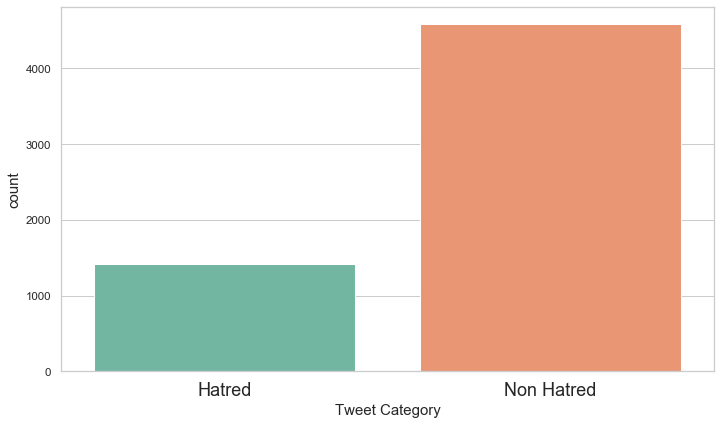

In [ ]:
# visualizing the count of sentiments
plt.figure(figsize=(10, 6))
bp = sns.countplot(x="Tweet Category", data=dataframe_final, palette="Set2")
plt.show()

In [ ]:
dataframe_final.to_csv('final_project_dataset_UAI.csv', encoding='utf-8')

# Usual methods to train the final data with Machine Learning Classifiers.

In [ ]:
# Split data into training and testing sets
X_train = dataframe_final["Tweet"]
y_train = dataframe_final["Tweet Category"]
X_test = dataframe_final["Tweet"]
y_test = dataframe_final["Tweet Category"]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier

In [ ]:
# Initializing the classifiers
classifiers = [
    ('Naive Bayes', MultinomialNB()),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('Bagging', BaggingClassifier(base_estimator=DecisionTreeClassifier())),
    ('AdaBoost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier())),
    ('Stacking', StackingClassifier(estimators=[
        ('svm', SVC()), 
        ('rf', RandomForestClassifier()), 
        ('dt', DecisionTreeClassifier())
    ], final_estimator=LogisticRegression()))
]

In [ ]:
def train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', classifier),
    ])
    
    pipeline.fit(X_train, y_train)
    train_accuracy = pipeline.score(X_train, y_train)
    test_accuracy = pipeline.score(X_test, y_test)

    return pipeline, train_accuracy, test_accuracy

Confusion Matrix for Naive Bayes:
[[ 260 1158]
 [   0 4582]]


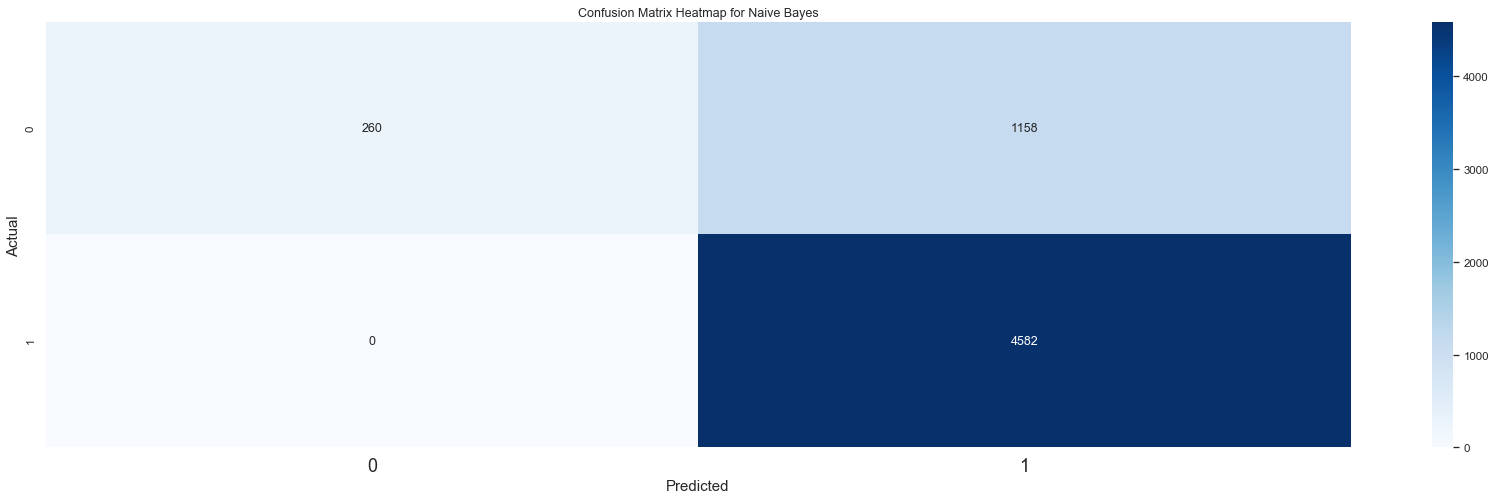

Confusion Matrix for Random Forest:
[[1417    1]
 [   0 4582]]


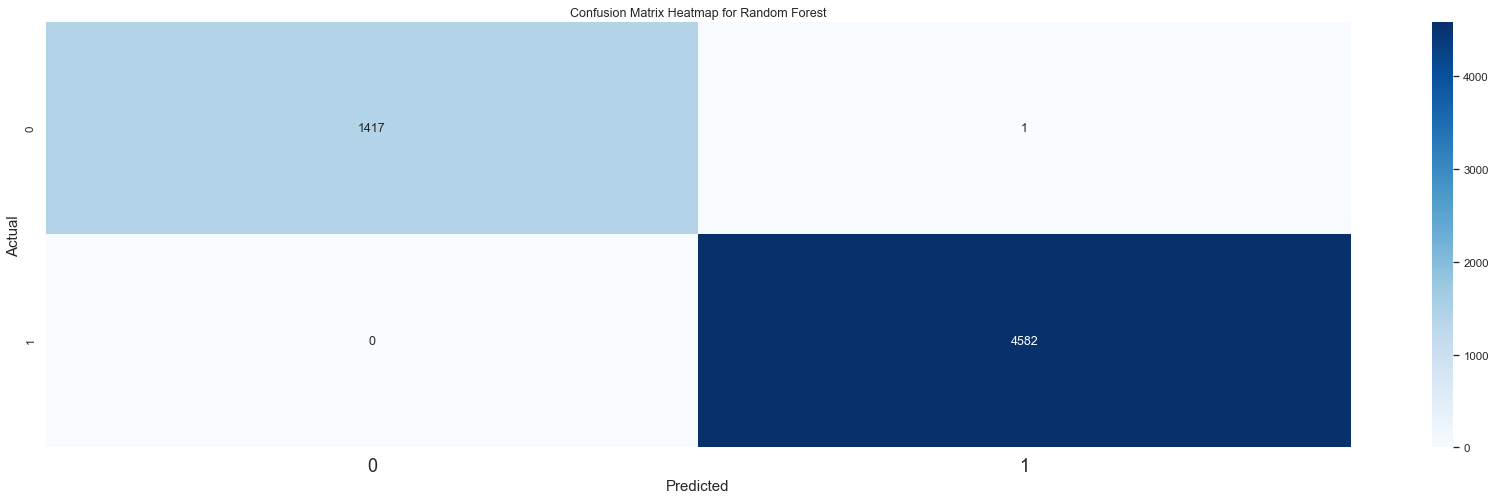

Confusion Matrix for Decision Tree:
[[1418    0]
 [   0 4582]]


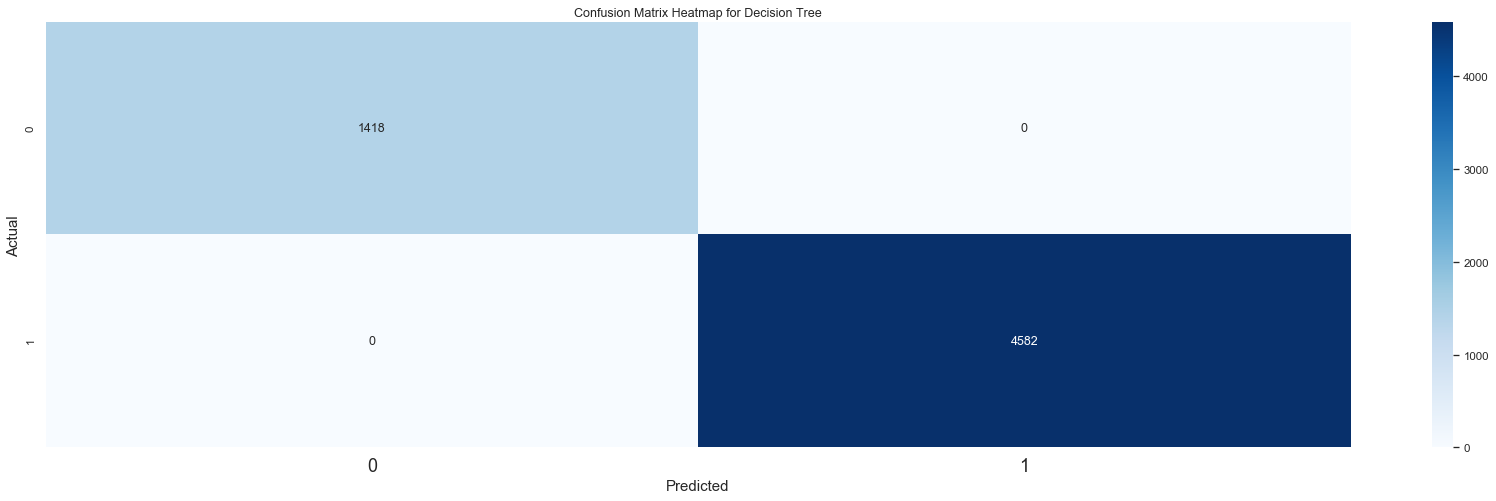

Confusion Matrix for SVM:
[[1284  134]
 [   0 4582]]


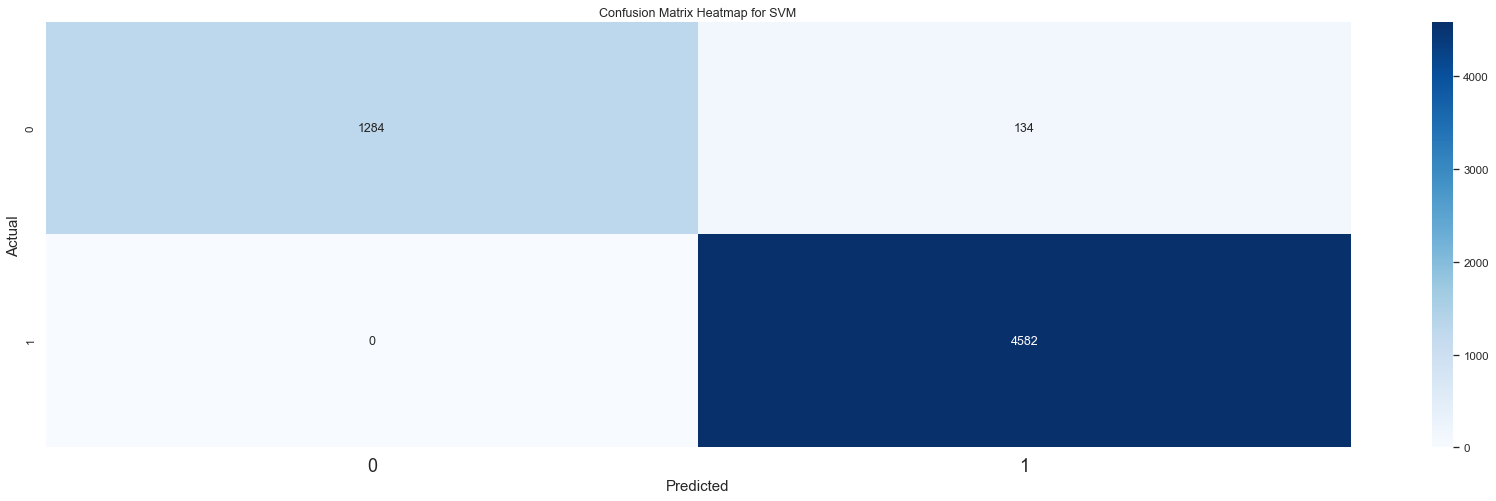

Confusion Matrix for KNN:
[[ 770  648]
 [ 268 4314]]


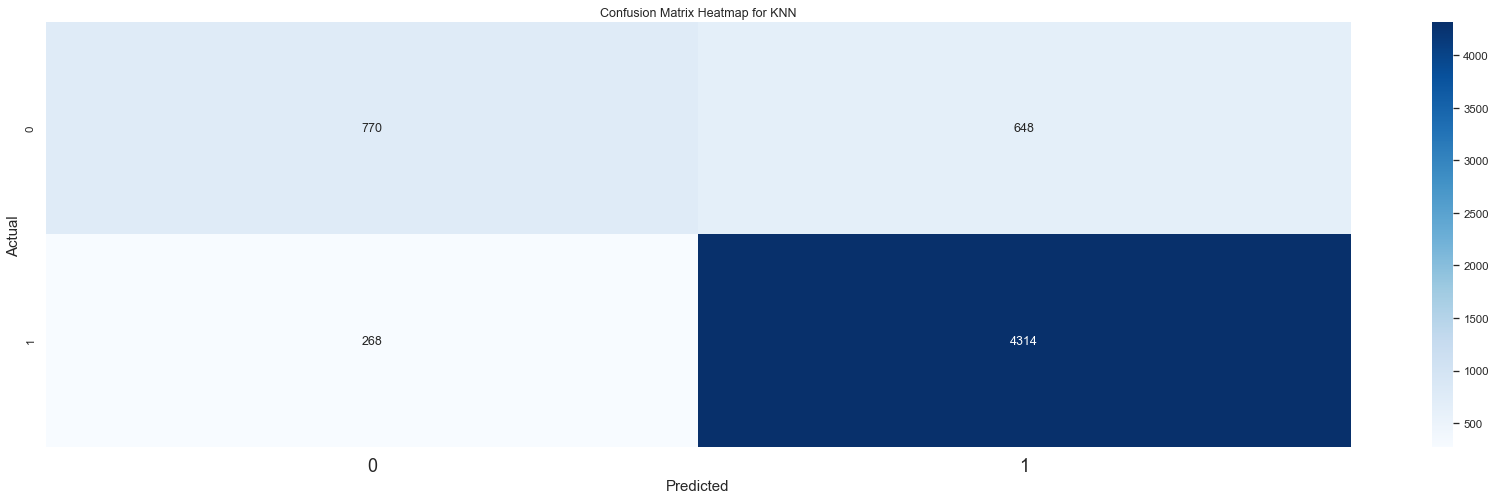

Confusion Matrix for Bagging:
[[1372   46]
 [  17 4565]]


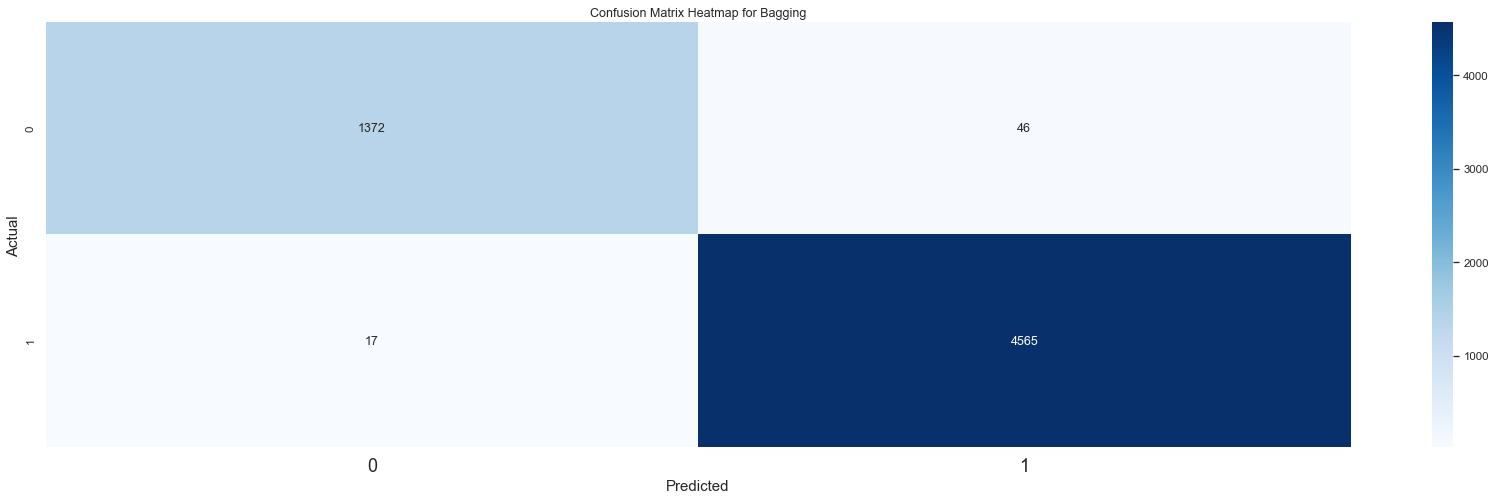

Confusion Matrix for AdaBoost:
[[1418    0]
 [   0 4582]]


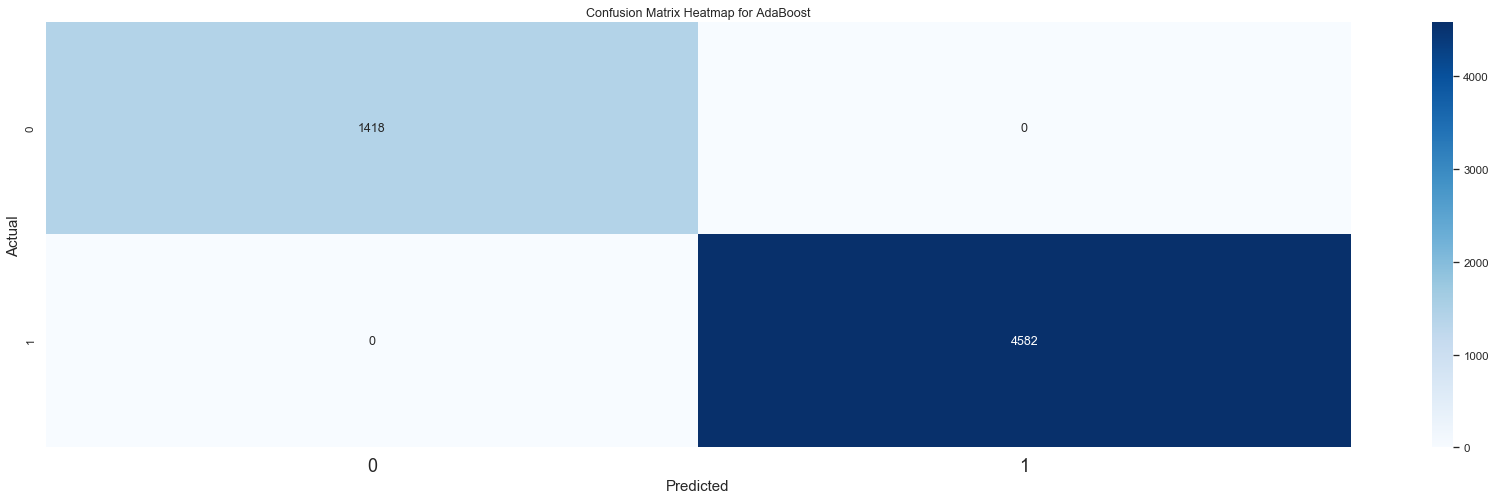

Confusion Matrix for Stacking:
[[1417    1]
 [   1 4581]]


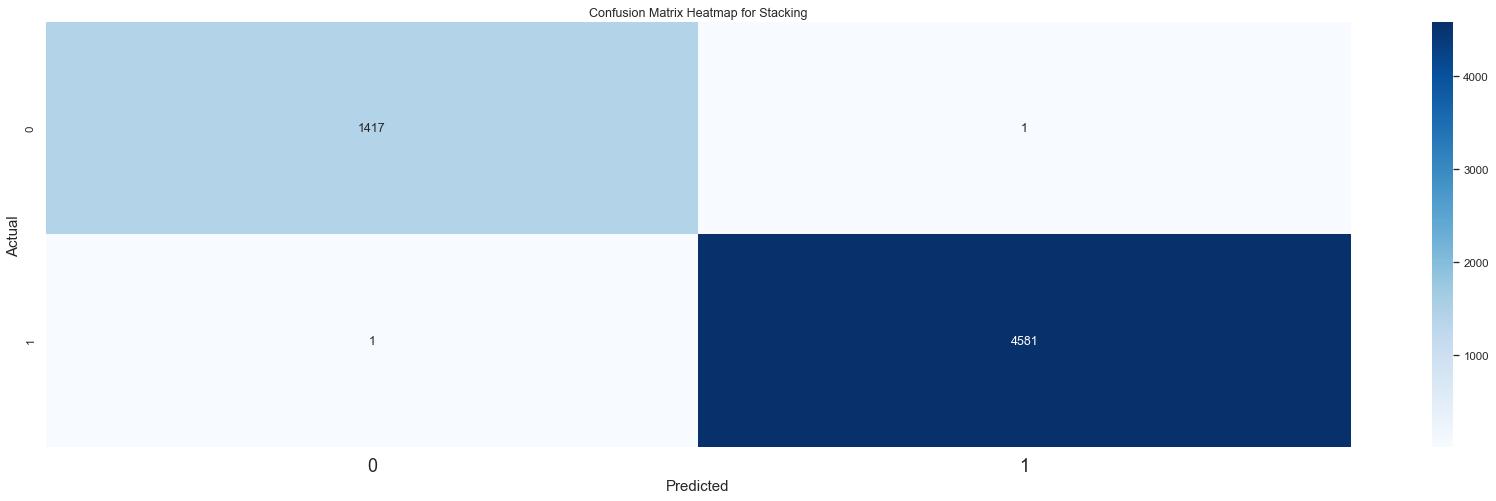

In [ ]:
results = []
for name, classifier in classifiers:
    model, train_accuracy, test_accuracy = train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test)
    results.append((name, train_accuracy, test_accuracy))
    
    # Compute the confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Print the confusion matrix
    print(f"Confusion Matrix for {name}:")
    print(cm)
    
    # Plot the confusion matrix heatmap
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix Heatmap for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [ ]:
print(results)

[('Naive Bayes', 0.807, 0.807), ('Random Forest', 0.9998333333333334, 0.9998333333333334), ('Decision Tree', 1.0, 1.0), ('SVM', 0.9776666666666667, 0.9776666666666667), ('KNN', 0.8473333333333334, 0.8473333333333334), ('Bagging', 0.9895, 0.9895), ('AdaBoost', 1.0, 1.0), ('Stacking', 0.9996666666666667, 0.9996666666666667)]


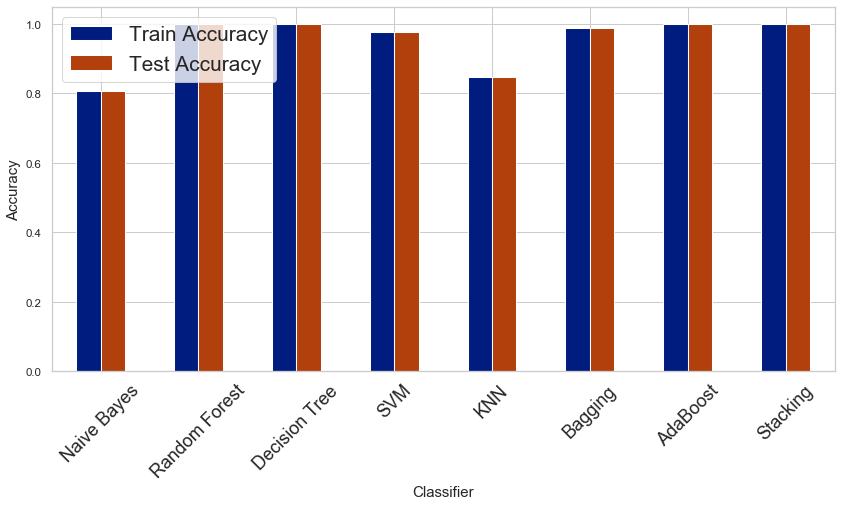

In [ ]:
# Plotting the accuracy scores for both train and test data
results_df = pd.DataFrame(results, columns=['Classifier', 'Train Accuracy', 'Test Accuracy'])
results_df.set_index('Classifier', inplace=True)

ax = results_df.plot(kind='bar', figsize=(12, 6))
ax.set_ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

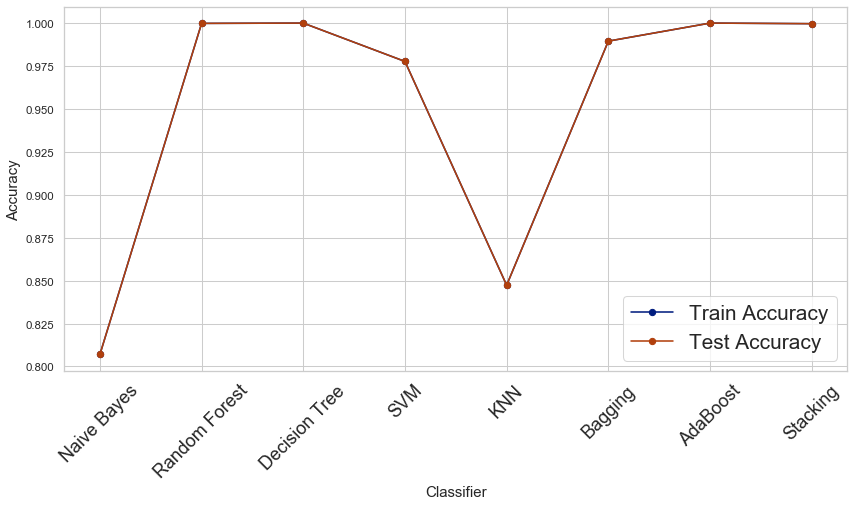

In [ ]:
results_df = pd.DataFrame(results, columns=['Classifier', 'Train Accuracy', 'Test Accuracy'])
results_df.set_index('Classifier', inplace=True)

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the training accuracy scores
results_df['Train Accuracy'].plot(kind='line', marker='o', label='Train Accuracy', ax=ax)

# Plotting the testing accuracy scores
results_df['Test Accuracy'].plot(kind='line', marker='o', label='Test Accuracy', ax=ax)

ax.set_ylabel('Accuracy')
ax.set_xticks(range(len(results_df.index)))
ax.set_xticklabels(results_df.index, rotation=45)
ax.legend()

plt.show()

# Hyperparameter tuning on the final data

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining hyperparameter search space for Random Forest
rf_params = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__bootstrap': [True, False],
}

# Defining hyperparameter search space for SVM
svm_params = {
    'clf__C': [0.1, 1, 10, 100],
    'clf__kernel': ['linear', 'rbf', 'sigmoid'],
    'clf__gamma': ['scale', 'auto'],
}
nb_params = {
    'clf__alpha': [0.1, 0.5, 1.0],
}

dt_params = {
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
}

knn_params = {
    'clf__n_neighbors': [3, 5, 7],
    'clf__weights': ['uniform', 'distance'],
    'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

bagging_params = {
    'clf__n_estimators': [10, 50, 100],
    'clf__max_samples': [0.5, 1.0],
    'clf__max_features': [0.5, 1.0],
}

adaboost_params = {
    'clf__n_estimators': [50, 100, 200],
    'clf__learning_rate': [0.1, 0.5, 1.0],
}

stacking_params = {
    'clf__final_estimator': [LogisticRegression(), RandomForestClassifier()],
}


# Adding search spaces to the classifiers list
classifiers = [
    ('Random Forest', RandomForestClassifier(), rf_params),
    ('SVM', SVC(), svm_params),
    ('Naive Bayes', MultinomialNB(), nb_params),
    ('Decision Tree', DecisionTreeClassifier(), dt_params),
    ('KNN', KNeighborsClassifier(), knn_params),
    ('Bagging', BaggingClassifier(base_estimator=DecisionTreeClassifier()), bagging_params),
    ('AdaBoost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), adaboost_params),
    ('Stacking', StackingClassifier(estimators=[
        ('svm', SVC()), 
        ('rf', RandomForestClassifier()), 
        ('dt', DecisionTreeClassifier())
    ]), stacking_params)
]

In [ ]:
# Performing hyperparameter tuning and prevent overfitting
best_classifiers = []
for name, classifier, params in classifiers:
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', classifier),
    ])
    
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_classifier = grid_search.best_estimator_
    train_accuracy = best_classifier.score(X_train, y_train)
    test_accuracy = best_classifier.score(X_test, y_test)
    
    best_classifiers.append((name, best_classifier, train_accuracy, test_accuracy))
    print(f"{name} - Best Parameters: {grid_search.best_params_}")

Random Forest - Best Parameters: {'clf__bootstrap': False, 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 50}
SVM - Best Parameters: {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
Naive Bayes - Best Parameters: {'clf__alpha': 0.1}
Decision Tree - Best Parameters: {'clf__max_depth': 20, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
KNN - Best Parameters: {'clf__algorithm': 'auto', 'clf__n_neighbors': 7, 'clf__weights': 'distance'}
Bagging - Best Parameters: {'clf__max_features': 0.5, 'clf__max_samples': 0.5, 'clf__n_estimators': 100}
AdaBoost - Best Parameters: {'clf__learning_rate': 0.5, 'clf__n_estimators': 50}
Stacking - Best Parameters: {'clf__final_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None

In [ ]:
# Printing results
new_results=[]
for name, best_classifier, train_accuracy, test_accuracy in best_classifiers:
    print(f"{name} - Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")
    new_results.append((name, train_accuracy, test_accuracy))

Random Forest - Train Accuracy: 1.00, Test Accuracy: 1.00
SVM - Train Accuracy: 1.00, Test Accuracy: 1.00
Naive Bayes - Train Accuracy: 0.96, Test Accuracy: 0.96
Decision Tree - Train Accuracy: 0.88, Test Accuracy: 0.88
KNN - Train Accuracy: 1.00, Test Accuracy: 1.00
Bagging - Train Accuracy: 0.94, Test Accuracy: 0.94
AdaBoost - Train Accuracy: 1.00, Test Accuracy: 1.00
Stacking - Train Accuracy: 1.00, Test Accuracy: 1.00


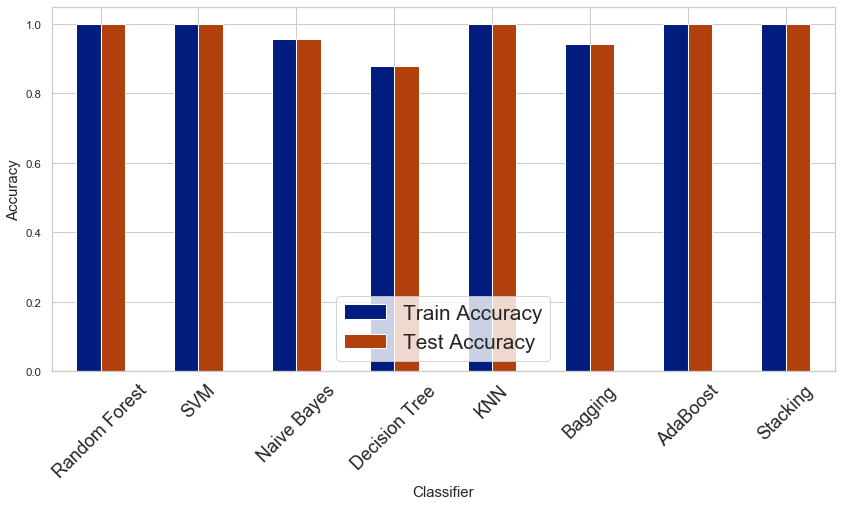

In [ ]:
# Plotting the accuracy scores for both hyperparameter tuned train and test data
results_best_df = pd.DataFrame(new_results, columns=['Classifier', 'Train Accuracy', 'Test Accuracy'])
results_best_df.set_index('Classifier', inplace=True)

ax = results_best_df.plot(kind='bar', figsize=(12, 6))
ax.set_ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

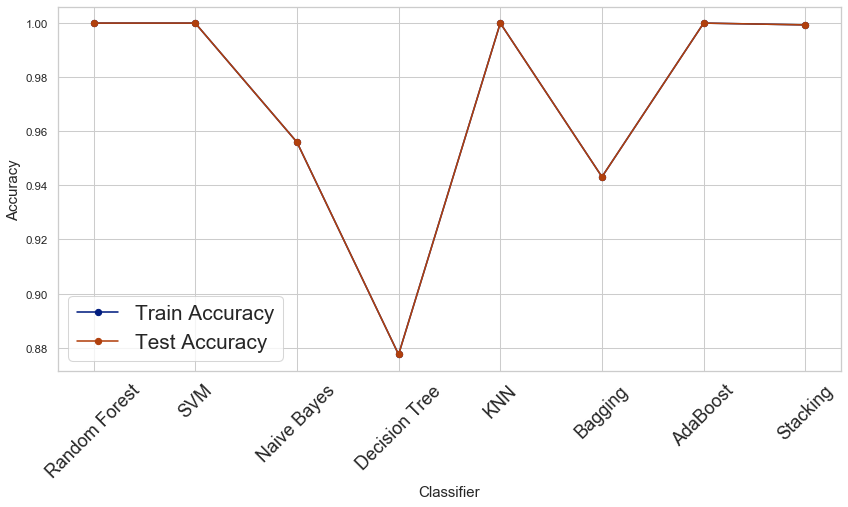

In [ ]:
results_best_df = pd.DataFrame(new_results, columns=['Classifier', 'Train Accuracy', 'Test Accuracy'])
results_best_df.set_index('Classifier', inplace=True)

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the training accuracy scores
results_best_df['Train Accuracy'].plot(kind='line', marker='o', label='Train Accuracy', ax=ax)

# Plotting the testing accuracy scores
results_best_df['Test Accuracy'].plot(kind='line', marker='o', label='Test Accuracy', ax=ax)

ax.set_ylabel('Accuracy')
ax.set_xticks(range(len(results_best_df.index)))
ax.set_xticklabels(results_best_df.index, rotation=45)
ax.legend()

plt.show()

# Tweet Hatred and Non-Hatred popularity VS Time

<Figure size 1125x750 with 0 Axes>

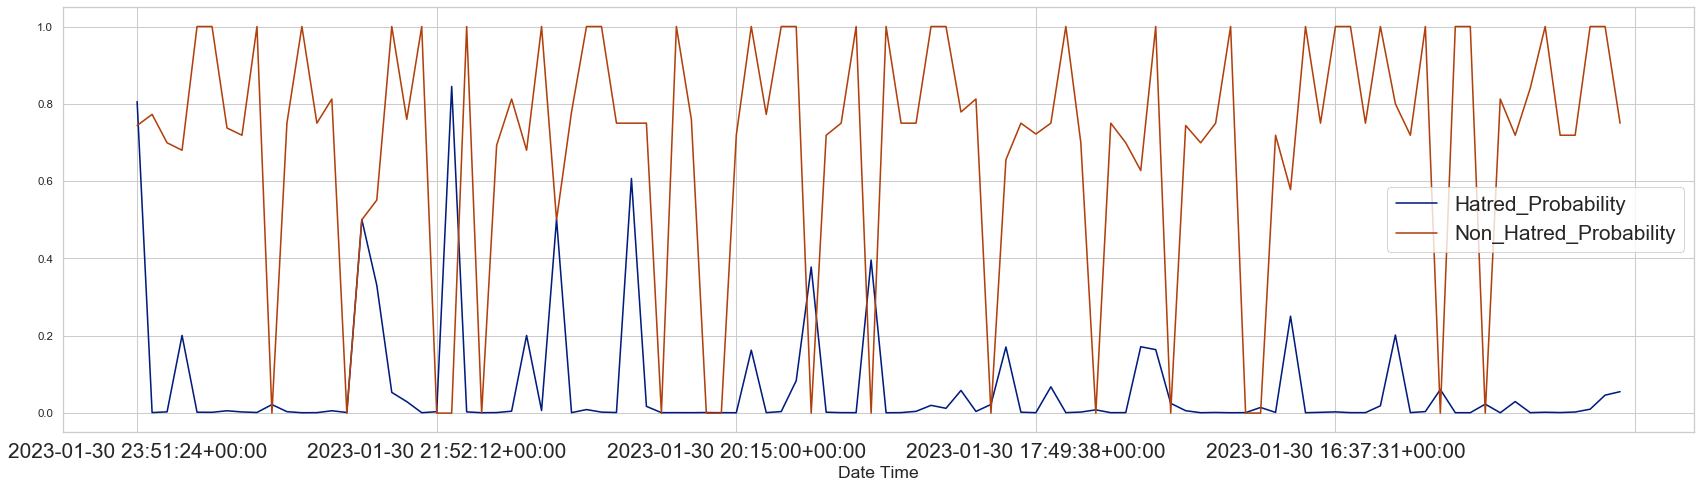

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 14})
dataframe_final.head(100).plot(x="Date_Time", y=["Hatred_Probability","Non_Hatred_Probability"], kind="line")
plt.xlabel("Date Time")
plt.show()

In [ ]:
dataframe_final.head()

Date_Time             Tweet_Id         Username  \
0  2023-01-30 23:51:24+00:00  1620208085418803201   ExactlyCharley   
1  2023-01-30 23:48:39+00:00  1620207396202348546    amiya_rbehera   
2  2023-01-30 23:45:23+00:00  1620206572357193729      Grossman4NJ   
3  2023-01-30 23:41:34+00:00  1620205611865735168  FirstRebelMedia   
4  2023-01-30 23:36:36+00:00  1620204362856529920    Wendy_stagirl   

                                               Tweet Sentiment  Happy  Angry  \
0  we so desperately needed a majority in the con...  Negative    0.0    0.0   
1  a party is by definition a faction that is uni...  Negative    0.0    0.0   
2  i yes desantis is supported by all republicans...  Positive    0.0    0.0   
3  until the students spent  a few years working ...  Positive    0.0    0.2   
4  who else needs a paper done before pm my dm is...   Neutral    0.0    0.0   

   Surprise   Sad  Fear  toxicity  severe_toxicity   obscene  identity_attack  \
0      0.20  0.20  0.60  0.656073         0.001051  0.385869         0.001050   
1      0.17  0.17  0.67  0.000754         0.000018  0.000119         0.000097   
2      0.33  0.33  0.33  0.002101         0.000012  0.000097         0.000104   
3      0.00  0.20  0.60  0.000646         0.000017  0.000102         0.000115   
4      0.00  0.00  1.00  0.001239         0.000038  0.000345         0.000201   

     insult    threat  sexual_explicit  Hatred_Probability  \
0  0.076037  0.000468         0.002299            0.805793   
1  0.000356  0.000024         0.000016            0.001383   
2  0.000887  0.000020         0.000017            0.003235   
3  0.000250  0.000026         0.000019            0.200940   
4  0.000391  0.000068         0.000035            0.002315   

   Non_Hatred_Probability Tweet Category  
0                0.744000         Hatred  
1                0.772663     Non Hatred  
2                0.699237     Non Hatred  
3                0.680000     Non Hatred  
4                1.000000     Non Hatred

In [ ]:
dataframe_final.dtypes

Date_Time                  object
Tweet_Id                    int64
Username                   object
Tweet                      object
Sentiment                  object
Happy                     float64
Angry                     float64
Surprise                  float64
Sad                       float64
Fear                      float64
toxicity                  float64
severe_toxicity           float64
obscene                   float64
identity_attack           float64
insult                    float64
threat                    float64
sexual_explicit           float64
Hatred_Probability        float64
Non_Hatred_Probability    float64
Tweet Category             object
dtype: object

In [ ]:
# saving resultant data to csv file
dataframe_final.to_csv('resultant_project_dataset_hatred_prediction.csv', encoding='utf-8')

# Performing some sqlite queries

In [ ]:
import sqlite3

# Connecting to the SQLite database and creating a table

In [ ]:
# Read the CSV file
csv_file = 'resultant_project_dataset_hatred_prediction.csv'
df = pd.read_csv(csv_file)

# Remove the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# Replace the space in the 'Tweet Category' column name with an underscore
if 'Tweet Category' in df.columns:
    df.rename(columns={'Tweet Category': 'Tweet_Category'}, inplace=True)


conn = sqlite3.connect('res_tweets.db')
c = conn.cursor()

c.execute('''CREATE TABLE IF NOT EXISTS tweets (
                Date_Time TEXT,
                Tweet_Id INTEGER PRIMARY KEY,
                Username TEXT,
                Tweet TEXT,
                Sentiment TEXT,
                Happy REAL,
                Angry REAL,
                Surprise REAL,
                Sad REAL,
                Fear REAL,
                toxicity REAL,
                severe_toxicity REAL,
                obscene REAL,
                identity_attack REAL,
                insult REAL,
                threat REAL,
                sexual_explicit REAL,
                Hatred_Probability REAL,
                Non_Hatred_Probability REAL,
                Tweet_Category TEXT
            )''')

conn.commit()

In [ ]:
# Insert CSV data into the table
df.to_sql('tweets', conn, if_exists='append', index=False)

In [ ]:
# Close the connection
conn.close()

# fetching all tweets

In [ ]:
def fetch_all_tweets():
    with sqlite3.connect('res_tweets.db') as conn:
        c = conn.cursor()
        c.execute('SELECT * FROM tweets')
        return c.fetchall()

tweets = fetch_all_tweets()
for tweet in tweets:
    print(tweet)

('2023-01-05 02:24:41+00:00', 1610824578967965701, 'GreenhousEfect', 'democrats fucking steal our elections and then they fuck us with shitty weather @ climatescam climatehoax dems are a hoax climate lie fakenews stolenelections fakevotes fakeelections votingmachines votemachines voters vote not robots scam bayarea flood', 'Negative', 0.6, 0.0, 0.2, 0.0, 0.2, 0.9904389381408693, 0.03894995525479317, 0.967462956905365, 0.012213729321956636, 0.9019299745559692, 0.004974087700247765, 0.1372164636850357, 0.9999751363016984, 0.7440000000000001, 'Hatred')
('2023-01-05 02:36:21+00:00', 1610827513588244481, 'Michele21612070', 'marco rubios call for stronger border security and fines for illegal immigration is something i couldnt agree more with and the next leader cannot allow americas border security to be undermined by illegal immigration midterm elections', 'Negative', 0.0, 0.0, 0.0, 0.0, 1.0, 0.0008490927284583449, 1.6159385268110782e-05, 7.600116077810526e-05, 0.00022789702052250502, 0.00

('2023-01-13 00:14:38+00:00', 1613690953453404160, 'uMontreal_news', 'you vote how you live according to fr a madeinquebec app that was testrun in last falls general elections next up ontario bc and maybe the uk cdnpolitics', 'Neutral', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005967558245174588, 2.249911631224677e-05, 0.00014933859347365797, 0.00011136927787447348, 0.00028075516456738114, 3.337396265123971e-05, 2.013672019529622e-05, 0.0012137274115909813, 0.0, 'Hatred')
('2023-01-13 00:15:34+00:00', 1613691186434252801, 'randognsac', 'check out this clip from episode  of the tinfoilhatpod with ipoli ard spot  guests   yshow elections voting freeandfairwatch the full episode on   tip some', 'Neutral', 0.0, 0.0, 0.0, 0.75, 0.25, 0.00034017011057585483, 4.541120506473817e-05, 0.0002757440379355103, 0.0001594058849150315, 0.0003988207608927041, 5.491157207870856e-05, 2.8655802452703938e-05, 0.001302461535042987, 0.8125, 'Non Hatred')
('2023-01-13 00:21:45+00:00', 1613692741485223937, 'hashrocks', 'we

('2023-01-22 20:35:21+00:00', 1617259647697653761, 'CohonPete', 'assaults on us democracy election integrity and the constitution elections democracy america', 'Negative', 0.0, 0.0, 0.0, 0.0, 1.0, 0.001313226530328393, 7.462401845259592e-05, 0.0006980799953453242, 0.000227320400881581, 0.0008304987568408251, 0.00010999733058270068, 8.474467176711187e-05, 0.0033344103004925296, 1.0, 'Non Hatred')
('2023-01-22 20:42:09+00:00', 1617261358310981638, 'TheMAGAWatch', 'abortion question has been returned to the american people penny nance  racist democracy elections maga midterms', 'Negative', 0.0, 0.0, 0.0, 0.0, 1.0, 0.33747535943984985, 0.0001947408891282976, 0.0030961022712290287, 0.011175191029906271, 0.061425670981407166, 0.0004396075673867017, 0.002082568360492587, 0.3886887058703392, 1.0, 'Non Hatred')
('2023-01-22 20:44:38+00:00', 1617261980179652608, 'LastStand2019', 'he who controls free speech controls the worldwe have witnessed this many times when big tech jumped in bed with the 

('2023-01-28 14:19:03+00:00', 1619339273500790785, 'MikeFreethinker', 'hey heres a novel ideaif you believe elections are rigged dont votesimple', 'Negative', 0.0, 0.0, 1.0, 0.0, 0.0, 0.002383584855124355, 7.549006113549693e-05, 0.0006602866342291236, 0.0004344430635683239, 0.0010993665782734752, 6.569496326847002e-05, 3.942126568290405e-05, 0.004750735085758295, 1.0, 'Non Hatred')
('2023-01-28 14:20:00+00:00', 1619339512269651972, 'BOLNewsEnglish', 'many abstained from voting in the second phase of the sindh lgpolls owing primarily to the political parties indifferencefor moreelectionslocalbodyelectionspppjiptimqmp', 'Positive', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0006231736042536795, 2.1803973140777092e-05, 0.00017498625675216317, 0.00011174117389600725, 0.0003510576789267361, 2.715729169722181e-05, 2.3405846150126308e-05, 0.0013327152943120035, 0.0, 'Hatred')
('2023-01-28 14:21:12+00:00', 1619339815136133124, 'TheMAGAWatch', 'they are criminals attacker blamed nancy pelosi hillary clinton fo

# fetching tweets which are filtered by username - "ExactlyCharley"

In [ ]:
def fetch_tweets_by_username(username):
    with sqlite3.connect('res_tweets.db') as conn:
        c = conn.cursor()
        c.execute('SELECT * FROM tweets WHERE Username = ?', (username,))
        return c.fetchall()

tweets = fetch_tweets_by_username('ExactlyCharley')
for tweet in tweets:
    print(tweet)

('2023-01-18 22:30:12+00:00', 1615838997711933440, 'ExactlyCharley', 'i truly love  appreciate myfollowersi couldnt get through the elections wo youim a dementiacaregiver  somewhat isolated tooso twitter is my entertainment  sanity', 'Positive', 0.5, 0.0, 0.0, 0.25, 0.25, 0.02456563524901867, 0.00015136344882193953, 0.000664934457745403, 0.0004938814672641456, 0.014384830370545387, 0.0004343970795162022, 0.00019109465938527137, 0.040456701374630984, 0.71875, 'Non Hatred')
('2023-01-30 23:51:24+00:00', 1620208085418803201, 'ExactlyCharley', 'we so desperately needed a majority in the congress at least  shitholes that should never have been elected ive lost confidence in our elections why hasnt santos opponent asked for a recall', 'Negative', 0.0, 0.0, 0.2, 0.2, 0.6, 0.6560734510421753, 0.0010512021835893393, 0.3858690559864044, 0.001049826038070023, 0.07603714615106583, 0.00046823365846648807, 0.0022993662860244517, 0.8057929020251764, 0.7440000000000001, 'Hatred')


# fetching tweets by sentiment 

In [ ]:
def fetch_tweets_by_sentiment(sentiment):
    with sqlite3.connect('res_tweets.db') as conn:
        c = conn.cursor()
        c.execute('SELECT * FROM tweets WHERE Sentiment = ?', (sentiment,))
        return c.fetchall()


tweets = fetch_tweets_by_sentiment('Positive')
for tweet in tweets:
    print(tweet)

('2023-01-05 02:37:57+00:00', 1610827917080297472, 'Michele21612070', 'marco rubio is a latin like descent as a latin brother he unconditionally supports him for campaign midterm elections', 'Positive', 0.0, 0.0, 1.0, 0.0, 0.0, 0.0009616746101528406, 5.81062340643257e-05, 0.0009096824796870352, 0.00018427080067340282, 0.0012700284132733939, 4.200112380203791e-05, 5.727666575694457e-05, 0.0034786807269123754, 1.0, 'Non Hatred')
('2023-01-05 02:43:11+00:00', 1610829232665686021, 'YvonneC21603701', 'midterm elections support rubio he is our future and hope', 'Positive', 0.0, 0.0, 0.0, 0.0, 1.0, 0.001011224347166717, 1.347960551356664e-05, 0.0001039866983774118, 8.631926903035492e-05, 0.00045806856360286485, 2.466407931933645e-05, 1.7749141989042982e-05, 0.0017146462795291086, 1.0, 'Non Hatred')
('2023-01-05 02:43:21+00:00', 1610829274369650693, 'Allison77870479', 'marco rubio is a latin like descent on his body he is young and talented and we have real talents we unconditionally support h

('2023-01-25 18:20:00+00:00', 1618312746650550273, 'medyanews_', '📌 peoples’ democratic party hdp cochair mithat sancar arr says the party is strong and ready for turkeys forthcoming elections', 'Positive', 1.0, 0.0, 0.0, 0.0, 0.0, 0.0014071158366277814, 1.6252750356215984e-05, 0.00013802053581457582, 0.00015299693041015416, 0.00047849109978415067, 3.689402365125716e-05, 2.15629261219874e-05, 0.002249926920916745, 1.0, 'Non Hatred')
('2023-01-25 18:20:12+00:00', 1618312796374196224, '1MedyaNews', '📌 peoples’ democratic party hdp cochair mithat sancar arr says the party is strong and ready for turkeys forthcoming elections', 'Positive', 1.0, 0.0, 0.0, 0.0, 0.0, 0.0014071158366277814, 1.6252750356215984e-05, 0.00013802053581457582, 0.00015299693041015416, 0.00047849109978415067, 3.689402365125716e-05, 2.15629261219874e-05, 0.002249926920916745, 1.0, 'Non Hatred')
('2023-01-25 18:20:44+00:00', 1618312933129482240, 'amiya_rbehera', 'peer reviewed decentralized govt where projects and polic

# Calculating the average for the probability of all toxicity which are represented as "Negative Sentiment"

In [ ]:
def avg_toxicity_by_sentiment(sentiment):
    with sqlite3.connect('res_tweets.db') as conn:
        c = conn.cursor()
        c.execute('SELECT AVG(toxicity) FROM tweets WHERE Sentiment = ?', (sentiment,))
        result = c.fetchone()
        return result[0] if result else None


average_toxicity = avg_toxicity_by_sentiment('Negative')
if average_toxicity is not None:
    print(f"Average toxicity of negative tweets: {average_toxicity}")
else:
    print("No records found for the given sentiment.")

Average toxicity of negative tweets: 0.09714302489875494


# Filtering tweets with respect to keyword

In [ ]:
def fetch_tweets_with_keyword(keyword):
    with sqlite3.connect('res_tweets.db') as conn:
        c = conn.cursor()
        c.execute(f"SELECT * FROM tweets WHERE Tweet LIKE '%{keyword}%'")
        return c.fetchall()

# Example usage:
tweets = fetch_tweets_with_keyword('support')
for tweet in tweets:
    print(tweet)

('2023-01-05 02:37:57+00:00', 1610827917080297472, 'Michele21612070', 'marco rubio is a latin like descent as a latin brother he unconditionally supports him for campaign midterm elections', 'Positive', 0.0, 0.0, 1.0, 0.0, 0.0, 0.0009616746101528406, 5.81062340643257e-05, 0.0009096824796870352, 0.00018427080067340282, 0.0012700284132733939, 4.200112380203791e-05, 5.727666575694457e-05, 0.0034786807269123754, 1.0, 'Non Hatred')
('2023-01-05 02:43:11+00:00', 1610829232665686021, 'YvonneC21603701', 'midterm elections support rubio he is our future and hope', 'Positive', 0.0, 0.0, 0.0, 0.0, 1.0, 0.001011224347166717, 1.347960551356664e-05, 0.0001039866983774118, 8.631926903035492e-05, 0.00045806856360286485, 2.466407931933645e-05, 1.7749141989042982e-05, 0.0017146462795291086, 1.0, 'Non Hatred')
('2023-01-05 02:43:21+00:00', 1610829274369650693, 'Allison77870479', 'marco rubio is a latin like descent on his body he is young and talented and we have real talents we unconditionally support h

# Top 5 tweets ordered by toxicity

In [ ]:
def top_toxic_tweets(limit=5):
    with sqlite3.connect('res_tweets.db') as conn:
        c = conn.cursor()
        c.execute('SELECT * FROM tweets ORDER BY toxicity DESC LIMIT ?', (limit,))
        return c.fetchall()

tweets = top_toxic_tweets()
for tweet in tweets:
    print(tweet)

('2023-01-05 11:47:55+00:00', 1610966320522067972, 'NikiasDevrim', 'mccarthy  is total shit only  republicans are against total shit wtf astonishing elections  are rigged but it doesnt matter because they are all total complete shit vote for who all shit', 'Negative', 0.0, 0.0, 0.71, 0.14, 0.14, 0.9956467747688292, 0.08565650880336761, 0.9760353565216064, 0.05381979420781136, 0.9445605278015136, 0.005602000281214714, 0.040067378431558616, 0.999995223767871, 0.785516, 'Hatred')
('2023-01-24 19:02:40+00:00', 1617961097541320705, 'UnfairlyTrump', 'you are so right i was a horrible president i was a liar i was stupid and i was weak trumpsucks elections', 'Negative', 0.0, 0.0, 0.0, 0.5, 0.5, 0.9946677684783936, 0.0023829524870961905, 0.22794057428836825, 0.003326693782582879, 0.9774903655052184, 0.001104282564483583, 0.003779129358008504, 0.9999083102800782, 0.75, 'Hatred')
('2023-01-17 02:48:02+00:00', 1615179107368636416, 'booster_hair', 'only fools will take zoonigeria political selectio

**Training data with LSTM**

In [1]:
import pandas as pd

In [5]:
from google.colab import files

In [6]:
uploaded = files.upload()

Saving resultant_project_dataset_hatred_prediction.csv to resultant_project_dataset_hatred_prediction.csv


In [7]:
file = 'resultant_project_dataset_hatred_prediction.csv'

In [8]:
data = pd.read_csv(file)

In [10]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [11]:
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['Tweet'].values)
X = tokenizer.texts_to_sequences(data['Tweet'].values)
X = pad_sequences(X)

In [12]:
y = data[['Hatred_Probability', 'Non_Hatred_Probability']].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
embed_dim = 128
lstm_out = 196
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
model.add(Dropout(0.5))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 49, 128)           256000    
                                                                 
 dropout_1 (Dropout)         (None, 49, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 196)               254800    
                                                                 
 dense_1 (Dense)             (None, 2)                 394       
                                                                 
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


# Fitting model and calculating accuracies for 10 epochs

In [17]:
batch_size = 32
epochs = 10
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/10
150/150 [==============================] - 45s 285ms/step - loss: 0.2962 - accuracy: 0.7688
Epoch 2/10
150/150 [==============================] - 42s 278ms/step - loss: 0.2882 - accuracy: 0.7688
Epoch 3/10
150/150 [==============================] - 44s 295ms/step - loss: 0.2876 - accuracy: 0.7688
Epoch 4/10
150/150 [==============================] - 41s 277ms/step - loss: 0.2880 - accuracy: 0.7688
Epoch 5/10
150/150 [==============================] - 43s 286ms/step - loss: 0.2879 - accuracy: 0.7688
Epoch 6/10
150/150 [==============================] - 42s 278ms/step - loss: 0.2872 - accuracy: 0.7688
Epoch 7/10
150/150 [==============================] - 42s 278ms/step - loss: 0.2871 - accuracy: 0.7688
Epoch 8/10
150/150 [==============================] - 42s 279ms/step - loss: 0.2876 - accuracy: 0.7688
Epoch 9/10
150/150 [==============================] - 42s 283ms/step - loss: 0.2865 - accuracy: 0.7688
Epoch 10/10
150/150 [==============================] - 42s 282ms/step - l

# Building Classification Report 

In [18]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
print(classification_report(y_test_classes, y_pred_classes))

38/38 [==============================] - 4s 80ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       308
           1       0.74      1.00      0.85       892

    accuracy                           0.74      1200
   macro avg       0.37      0.50      0.43      1200
weighted avg       0.55      0.74      0.63      1200



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Building Classification Report in terms of heatmap

In [28]:
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

38/38 [==============================] - 4s 105ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


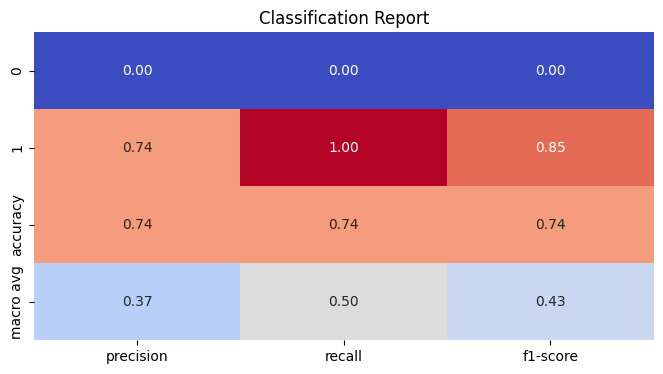

In [29]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate the classification report as a dictionary
report_dict = classification_report(y_test_classes, y_pred_classes, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Plot the classification report using seaborn heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='coolwarm', fmt='.2f', cbar=False)
plt.title('Classification Report')
plt.show()

**Plot accuracies**

In [30]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.1)

Epoch 1/10
135/135 [==============================] - 46s 338ms/step - loss: 0.2863 - accuracy: 0.7729 - val_loss: 0.2844 - val_accuracy: 0.7312
Epoch 2/10
135/135 [==============================] - 39s 292ms/step - loss: 0.2858 - accuracy: 0.7729 - val_loss: 0.2880 - val_accuracy: 0.7312
Epoch 3/10
135/135 [==============================] - 39s 287ms/step - loss: 0.2860 - accuracy: 0.7729 - val_loss: 0.2866 - val_accuracy: 0.7312
Epoch 4/10
135/135 [==============================] - 39s 287ms/step - loss: 0.2856 - accuracy: 0.7729 - val_loss: 0.2962 - val_accuracy: 0.7312
Epoch 5/10
135/135 [==============================] - 40s 296ms/step - loss: 0.2861 - accuracy: 0.7729 - val_loss: 0.2881 - val_accuracy: 0.7312
Epoch 6/10
135/135 [==============================] - 39s 288ms/step - loss: 0.2853 - accuracy: 0.7729 - val_loss: 0.2910 - val_accuracy: 0.7312
Epoch 7/10
135/135 [==============================] - 39s 288ms/step - loss: 0.2862 - accuracy: 0.7729 - val_loss: 0.2833 - val_ac

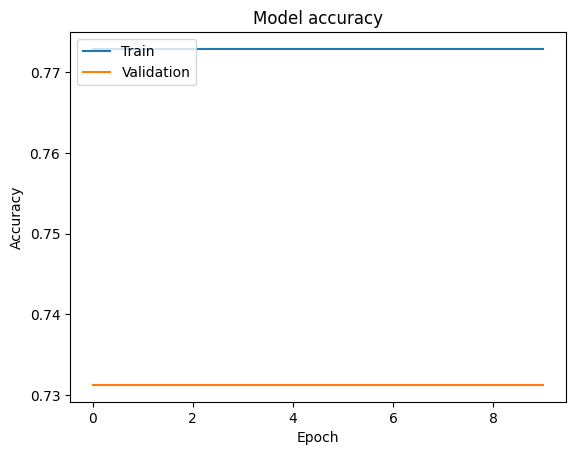

In [31]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()